# Projet N°6: 📚 Analyse des ventes

## Table des matières

* [Données](#donnees)
    * [Initialisation des données](#initialisation_des_données)
        * [Clients](#clients)
        * [Produits](#produits)
        * [Transactions](#transactions) 
    * [Suppression doublons/valeurs](#suppression_doublons/valeurs)
    * [Jointure](#jointure)
        * [Valeurs manquantes](#valeurs_manquantes)
        * [Remplacement valeur](#remplacement_valeur)
    * [Dataframe final](#dataframe_final)
* [Ajout colonnes](#ajout_colonne)
* [Dataframe Client](#dataframe_client)
* [Analyse du chiffre d'affaire](#analyse_ca)
    * [Saisonnalité](#saisonnalité)
* [Analyse des clients](#analyse_clients)
    * [lorenz](#lorenz)
    * [Client Pro](#analyse_clientpro)
        * [Analyse du chiffre d'affaire](#analyse_pro)
    * [Client particulier](#client_parti)
        * [Analyse du chiffre d'affaire](#ca_clientparti)
        * [Analyse par sexe](#analyse_sex)
        * [Analyse par âge](#analyse_age_clientparti)
* [Test de mes variables](#test_variable)
    * [CHI2 (Sexe et Categ)](#chi2)
    * [Spearman (Age et CA)](#age_ca_corre)
    * [Spearman (Age et frequence d'achat)](#age_fre_corre)
    * [Spearman (Age et panier moyen)](#age_panier_corre)
    * [ANOVA (categ et age)](#anova)
        * [Normalité des résidus](#residus)
        * [Egalite des variances](#variance)
        * [Kruskal-Wallis](#kruskal)
    

In [1]:
#Importation de mes librairies necessaire pour mon projet

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as gp


from scipy.stats import pearsonr
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import kendalltau, spearmanr
import scipy.stats as stats

# Données <a class="anchor" id="donnees"></a>

## Initialisation des données <a class="anchor" id="initialisation_des_données"></a>


Nous avons 3 jeux de donnée : 

**customer** Contient l'identifiant, le sexe et l'année de naissance

**produits** contient le produit, le prix et sa catégorie

**transactions** contient le produit, la date, les identifiant et le client

In [3]:
customer=pd.read_csv('customers.csv')
produit=pd.read_csv('products.csv')
transaction=pd.read_csv('transactions.csv')

### Clients <a class="anchor" id="clients"></a>

In [4]:
customer

client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8618    c_7920   m   1956
8619    c_7403   f   1970
8620    c_5119   m   1974
8621    c_5643   f   1968
8622      c_84   f   1982

[8623 rows x 3 columns]

In [5]:
#On verifie le nombre de doublons dans le dataframe

def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons parfait')

doublons(customer)

0 doublons parfait


In [6]:
#Fonction clé primaire

def cle_primaire(df_cle):
    table_length = len(df_cle) - len(df_cle.drop_duplicates())
    if table_length == 0:
            print('Clé primaire (0 doublon)')
    else:
            print('Pas une clé primaire (', table_length, 'doublons )')
    
cle_primaire(customer['client_id'])

Clé primaire (0 doublon)


In [7]:
customer.info()
#Verifie le nombre de ligne non nul + le Dtype des colonnes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [8]:
customer.describe(include='all')
#Deux sex, date de naissance de 1929 à 2004

client_id   sex        birth
count       8623  8623  8623.000000
unique      8623     2          NaN
top       c_4410     f          NaN
freq           1  4491          NaN
mean         NaN   NaN  1978.280877
std          NaN   NaN    16.919535
min          NaN   NaN  1929.000000
25%          NaN   NaN  1966.000000
50%          NaN   NaN  1979.000000
75%          NaN   NaN  1992.000000
max          NaN   NaN  2004.000000

In [9]:
#Nous avons sex différents dans la colonne sex: Homme ou femme
customer['sex'].unique()

array(['f', 'm'], dtype=object)

### Produits <a class="anchor" id="produits"></a>

In [10]:
produit

id_prod   price  categ
0     0_1421   19.99      0
1     0_1368    5.13      0
2      0_731   17.99      0
3      1_587    4.99      1
4     0_1507    3.99      0
...      ...     ...    ...
3282    2_23  115.99      2
3283   0_146   17.14      0
3284   0_802   11.22      0
3285   1_140   38.56      1
3286  0_1920   25.16      0

[3287 rows x 3 columns]

In [11]:
#On verifie le nombre de doublons dans le dataframe

def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons parfait')

doublons(customer)

0 doublons parfait


In [12]:
#Fonction clé primaire

def cle_primaire(df_cle):
  table_length = len(df_cle) - len(df_cle.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')
    
cle_primaire(produit['id_prod'])

Clé primaire (0 doublon)


In [13]:
produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [14]:
produit.describe(include='all')

id_prod        price        categ
count     3287  3287.000000  3287.000000
unique    3287          NaN          NaN
top     0_1421          NaN          NaN
freq         1          NaN          NaN
mean       NaN    21.856641     0.370246
std        NaN    29.847908     0.615387
min        NaN    -1.000000     0.000000
25%        NaN     6.990000     0.000000
50%        NaN    13.060000     0.000000
75%        NaN    22.990000     1.000000
max        NaN   300.000000     2.000000

Nous avons un produit avec un prix négatif(-1)

In [15]:
#Mise en évidence du produit T_0 à prix négatif
produit.nsmallest(10,'price',keep='all')

id_prod  price  categ
731      T_0  -1.00      0
2272   0_528   0.62      0
2355   0_202   0.62      0
370    0_120   0.66      0
1211  0_1844   0.77      0
1530  0_1620   0.80      0
2302  0_1364   0.81      0
2425   0_612   0.88      0
2772   0_902   0.92      0
686   0_2138   0.93      0

In [16]:
#Nous avons 3 catégorie différentes
produit['categ'].unique()

array([0, 1, 2], dtype=int64)

### Transactions <a class="anchor" id="transactions"></a>

In [17]:
transaction

id_prod                        date session_id client_id
0       0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1        1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2       0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3        2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4       0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232
...        ...                         ...        ...       ...
679527  0_1551  2022-01-15 13:05:06.246925   s_150195    c_8489
679528   1_639  2022-03-19 16:03:23.429229   s_181434    c_4370
679529  0_1425  2022-12-20 04:33:37.584749   s_314704     c_304
679530  0_1994  2021-07-16 20:36:35.350579    s_63204    c_2227
679531   1_523  2022-09-28 01:12:01.973763   s_274568    c_3873

[679532 rows x 4 columns]

In [18]:
#On verifie le nombre de doublons dans le dataframe

def doublons(df):
    print(len(df) - len(df.drop_duplicates()), 'doublons parfait')

doublons(transaction)

126 doublons parfait


In [19]:
#Fonction clé primaire

def cle_primaire(df_cle):
  table_length = len(df_cle) - len(df_cle.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')
    
cle_primaire(transaction[['id_prod','date']])

Pas une clé primaire ( 161 doublons )


In [20]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [21]:
transaction.describe(include='all')

id_prod                             date session_id client_id
count   679532                           679532     679532    679532
unique    3267                           679371     342316      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      2252                               13        200     25488

## Suppression doublons/valeurs <a class="anchor" id="suppression_doublons/valeurs"></a>

In [22]:
#Mise en évidence des doublons 
transaction[transaction.duplicated(keep=False)].describe(include='all')

id_prod                             date session_id client_id
count      183                              183        183       183
unique       1                               36          1         2
top        T_0  test_2021-03-01 02:30:02.237413        s_0      ct_0
freq       183                               13        183        96

In [23]:
#Suppression doublons parfait car ligne test
transaction.drop_duplicates(inplace=True)

In [24]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679406 non-null  object
 1   date        679406 non-null  object
 2   session_id  679406 non-null  object
 3   client_id   679406 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


les 126 doublons bien supprimé 406+126 = 532

In [25]:
transaction.describe(include='all')

id_prod                             date session_id client_id
count   679406                           679406     679406    679406
unique    3267                           679371     342316      8602
top      1_369  test_2021-03-01 02:30:02.237449        s_0    c_1609
freq      2252                                2         74     25488

In [26]:
#Recherche de ligne dans colonne date commencant par test
#Il nous reste 74 lignes test dans notre df
transaction[transaction.date.str.startswith('test')].describe(include='all')

id_prod                             date session_id client_id
count       74                               74         74        74
unique       1                               39          1         2
top        T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
freq        74                                2         74        37

In [27]:
# Prendre les valeurs de l'index pour les lignes ou date=test dans un dataFrame
indexNames = transaction[transaction.date.str.startswith('test')].index
# supprimer ces lignes ou l'on à leur index du dataFrame
transaction.drop(indexNames , inplace=True)

In [28]:
# Prendre les valeurs de l'index pour les lignes ou id_prod=T_0 dans un dataFrame
indexName = produit[produit['id_prod'] == 'T_0' ].index
# supprimer ces lignes ou l'on à leur index du dataFrame
produit.drop(indexName , inplace=True)

In [29]:
#Verification
transaction[transaction.date.str.startswith('test')].describe(include='all')

id_prod date session_id client_id
count        0    0          0         0
unique       0    0          0         0
top        NaN  NaN        NaN       NaN
freq       NaN  NaN        NaN       NaN

In [30]:
transaction[transaction['id_prod'] == 'T_0'].describe(include='all')

id_prod date session_id client_id
count        0    0          0         0
unique       0    0          0         0
top        NaN  NaN        NaN       NaN
freq       NaN  NaN        NaN       NaN

In [31]:
#Fonction clé primaire

def cle_primaire(df_cle):
  table_length = len(df_cle) - len(df_cle.drop_duplicates())
  if table_length == 0:
    print('Clé primaire (0 doublon)')
  else:
    print('Pas une clé primaire (', table_length, 'doublons )')
    
cle_primaire(transaction[['id_prod','date']])

Clé primaire (0 doublon)


Il n'y a plus de doublons dans notre clé primaire 

In [32]:
#On peut enfin passer la colonne date en type datetime
transaction['date']=pd.to_datetime(transaction['date'])
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [33]:
#Afficher nos min et max dates
str(transaction['date'].min())[:10], str(transaction['date'].max())[:10]

('2021-03-01', '2023-02-28')

## Jointure <a class="anchor" id="jointure"></a>

Jointure de transaction avec **produit** et **customer**

In [34]:
transaXprodXcust= transaction.merge(produit,on='id_prod',how='outer', indicator=True).merge(customer,on='client_id',how='outer',indicator='test')
transaXprodXcust.head(10)

id_prod                       date session_id client_id  price  categ  \
0  0_1518 2022-05-20 13:21:29.043970   s_211425     c_103   4.18    0.0   
1  0_1518 2021-07-20 13:21:29.043970    s_64849     c_103   4.18    0.0   
2  0_1518 2022-08-20 13:21:29.043970   s_255965     c_103   4.18    0.0   
3  0_1418 2022-06-18 01:49:37.823274   s_225411     c_103   8.57    0.0   
4  0_1418 2021-08-18 01:49:37.823274    s_77214     c_103   8.57    0.0   
5  0_2110 2022-07-27 22:36:01.316670   s_244686     c_103   7.04    0.0   
6  0_2110 2021-12-27 22:36:01.316670   s_141025     c_103   7.04    0.0   
7  0_1083 2021-12-21 02:10:36.948191   s_137499     c_103  16.99    0.0   
8   1_381 2021-03-09 22:50:06.094144     s_4122     c_103  15.99    1.0   
9   1_370 2022-09-07 18:33:52.869353   s_264739     c_103  13.11    1.0   

  _merge sex   birth  test  
0   both   f  1986.0  both  
1   both   f  1986.0  both  
2   both   f  1986.0  both  
3   both   f  1986.0  both  
4   both   f  1986.0  both  
5   both   f  1986.0  both  
6   both   f  1986.0  both  
7   both   f  1986.0  both  
8   both   f  1986.0  both  
9   both   f  1986.0  both

### Valeurs manquantes <a class="anchor" id="valeurs_manquantes"></a>

Valeur manquantes **transa/produit**

In [35]:
transaXprodXcust['_merge'].value_counts()

both          679111
left_only        221
right_only        21
Name: _merge, dtype: int64

In [36]:
#Mise en évidence des 221 lignes seulement disponible sur le dataframe transaction
transaXprodXcust[transaXprodXcust['_merge']=='left_only'].describe(include='all')

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\809369287.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaXprodXcust[transaXprodXcust['_merge']=='left_only'].describe(include='all')


id_prod                        date session_id client_id  price  categ  \
count      221                         221        221       221    0.0    0.0   
unique       1                         221        221       100    NaN    NaN   
top     0_2245  2021-04-22 04:57:20.090378    s_23987    c_6714    NaN    NaN   
freq       221                           1          1         6    NaN    NaN   
first      NaN  2021-03-01 00:09:29.301897        NaN       NaN    NaN    NaN   
last       NaN  2023-02-21 04:06:19.106398        NaN       NaN    NaN    NaN   
mean       NaN                         NaN        NaN       NaN    NaN    NaN   
std        NaN                         NaN        NaN       NaN    NaN    NaN   
min        NaN                         NaN        NaN       NaN    NaN    NaN   
25%        NaN                         NaN        NaN       NaN    NaN    NaN   
50%        NaN                         NaN        NaN       NaN    NaN    NaN   
75%        NaN                         NaN        NaN       NaN    NaN    NaN   
max        NaN                         NaN        NaN       NaN    NaN    NaN   

           _merge  sex        birth  test  
count         221  221   221.000000   221  
unique          1    2          NaN     1  
top     left_only    f          NaN  both  
freq          221  117          NaN   221  
first         NaN  NaN          NaN   NaN  
last          NaN  NaN          NaN   NaN  
mean          NaN  NaN  1977.782805   NaN  
std           NaN  NaN    10.837556   NaN  
min           NaN  NaN  1933.000000   NaN  
25%           NaN  NaN  1973.000000   NaN  
50%           NaN  NaN  1979.000000   NaN  
75%           NaN  NaN  1984.000000   NaN  
max           NaN  NaN  2002.000000   NaN

Nous pouvons en déduire grâce au describe() qu'un **seul produit** à été vendu **221** fois sans prix n'y catégorie


In [37]:
#Mise en évidence des 21 lignes seulement disponible sur le dataframe produit
transaXprodXcust[transaXprodXcust['_merge']=='right_only'].describe(include='all')

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\3351547565.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaXprodXcust[transaXprodXcust['_merge']=='right_only'].describe(include='all')


id_prod date session_id client_id       price      categ      _merge  \
count       21    0          0         0   21.000000  21.000000          21   
unique      21    0          0         0         NaN        NaN           1   
top     0_1016  NaN        NaN       NaN         NaN        NaN  right_only   
freq         1  NaN        NaN       NaN         NaN        NaN          21   
mean       NaN  NaN        NaN       NaN   37.870476   0.380952         NaN   
std        NaN  NaN        NaN       NaN   56.619963   0.740013         NaN   
min        NaN  NaN        NaN       NaN    0.800000   0.000000         NaN   
25%        NaN  NaN        NaN       NaN    2.990000   0.000000         NaN   
50%        NaN  NaN        NaN       NaN   22.050000   0.000000         NaN   
75%        NaN  NaN        NaN       NaN   31.820000   0.000000         NaN   
max        NaN  NaN        NaN       NaN  220.990000   2.000000         NaN   

        sex  birth       test  
count     0    0.0         21  
unique    0    NaN          1  
top     NaN    NaN  left_only  
freq    NaN    NaN         21  
mean    NaN    NaN        NaN  
std     NaN    NaN        NaN  
min     NaN    NaN        NaN  
25%     NaN    NaN        NaN  
50%     NaN    NaN        NaN  
75%     NaN    NaN        NaN  
max     NaN    NaN        NaN

Nous pouvons en déduire que **21 produits** n'ont jamais était vendu

Valeur manquante **transa/client**

In [38]:
transaXprodXcust['test'].value_counts()

both          679332
right_only        23
left_only         21
Name: test, dtype: int64

In [39]:
transaXprodXcust[transaXprodXcust['test']=='right_only'].describe(include='all')

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\2472107554.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaXprodXcust[transaXprodXcust['test']=='right_only'].describe(include='all')


id_prod date session_id client_id  price  categ _merge  sex  \
count        0    0          0        23    0.0    0.0      0   23   
unique       0    0          0        23    NaN    NaN      0    2   
top        NaN  NaN        NaN    c_8253    NaN    NaN    NaN    f   
freq       NaN  NaN        NaN         1    NaN    NaN    NaN   12   
mean       NaN  NaN        NaN       NaN    NaN    NaN    NaN  NaN   
std        NaN  NaN        NaN       NaN    NaN    NaN    NaN  NaN   
min        NaN  NaN        NaN       NaN    NaN    NaN    NaN  NaN   
25%        NaN  NaN        NaN       NaN    NaN    NaN    NaN  NaN   
50%        NaN  NaN        NaN       NaN    NaN    NaN    NaN  NaN   
75%        NaN  NaN        NaN       NaN    NaN    NaN    NaN  NaN   
max        NaN  NaN        NaN       NaN    NaN    NaN    NaN  NaN   

              birth        test  
count     23.000000          23  
unique          NaN           1  
top             NaN  right_only  
freq            NaN          23  
mean    1985.826087         NaN  
std       19.548662         NaN  
min     1956.000000         NaN  
25%     1964.000000         NaN  
50%     1997.000000         NaN  
75%     2001.000000         NaN  
max     2004.000000         NaN

Nous avons **23 clients** qui n'ont jamais passé de commande

In [40]:
#Mise en évidence des 21 lignes seulement disponible sur le dataframe transaction/produit
transaXprodXcust[transaXprodXcust['test']=='left_only'].describe(include='all')

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\3825146806.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaXprodXcust[transaXprodXcust['test']=='left_only'].describe(include='all')


id_prod date session_id client_id       price      categ      _merge  \
count       21    0          0         0   21.000000  21.000000          21   
unique      21    0          0         0         NaN        NaN           1   
top     0_1016  NaN        NaN       NaN         NaN        NaN  right_only   
freq         1  NaN        NaN       NaN         NaN        NaN          21   
mean       NaN  NaN        NaN       NaN   37.870476   0.380952         NaN   
std        NaN  NaN        NaN       NaN   56.619963   0.740013         NaN   
min        NaN  NaN        NaN       NaN    0.800000   0.000000         NaN   
25%        NaN  NaN        NaN       NaN    2.990000   0.000000         NaN   
50%        NaN  NaN        NaN       NaN   22.050000   0.000000         NaN   
75%        NaN  NaN        NaN       NaN   31.820000   0.000000         NaN   
max        NaN  NaN        NaN       NaN  220.990000   2.000000         NaN   

        sex  birth       test  
count     0    0.0         21  
unique    0    NaN          1  
top     NaN    NaN  left_only  
freq    NaN    NaN         21  
mean    NaN    NaN        NaN  
std     NaN    NaN        NaN  
min     NaN    NaN        NaN  
25%     NaN    NaN        NaN  
50%     NaN    NaN        NaN  
75%     NaN    NaN        NaN  
max     NaN    NaN        NaN

Nous retombons sur nos **21 produits**  jamais vendu

Nous pouvons donc en déduire qu'il y a : 

-21 produits jamais vendu 

-23 clients qui n'ont jamais passé de commande

Je peux donc les supprimer de mes calculs

In [41]:
nonproduits=transaXprodXcust[transaXprodXcust['_merge']=='right_only'].index
transaXprodXcust.drop(nonproduits, inplace=True)

In [42]:
transaXprodXcust[transaXprodXcust['_merge']=='right_only']


Empty DataFrame
Columns: [id_prod, date, session_id, client_id, price, categ, _merge, sex, birth, test]
Index: []

In [43]:
nonclients=transaXprodXcust[transaXprodXcust['test']=='right_only'].index
transaXprodXcust.drop(nonclients, inplace=True)

In [44]:
transaXprodXcust[transaXprodXcust['test']=='right_only']

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, price, categ, _merge, sex, birth, test]
Index: []

# Remplacement  valeurs <a class="anchor" id="remplacement_valeur"></a>

In [45]:
#Je verifie qu'il n'y a pas de valeur Nan autre part que pour mon id_prod sans prix
transa_nul=transaXprodXcust[transaXprodXcust['categ'].isnull()]
transa_nul.nunique()

id_prod         1
date          221
session_id    221
client_id     100
price           0
categ           0
_merge          1
sex             2
birth          35
test            1
dtype: int64

In [46]:
dfcat = transaXprodXcust.copy().dropna() #Toute les transactions sans notre produit 0_2245

#Les deux premiers caractere de id_prod convertie en string
dfcat['id_prod'] = dfcat['id_prod'].str[:2]

pd.crosstab(dfcat['categ'],dfcat['id_prod'])

id_prod      0_      1_     2_
categ                         
0.0      415459       0      0
1.0           0  227169      0
2.0           0       0  36483

In [47]:
#Mise en place de la categ 0 pour 0_2245 
transaXprodXcust['categ']=transaXprodXcust['categ'].fillna(0)

In [48]:
#Calcul de la valeur moyenne de nos produits cat 0
produitcat=produit.groupby(by='categ')['price'].mean().reset_index()
produitcat

categ       price
0      0   11.732795
1      1   25.531421
2      2  108.354686

In [49]:
#Mise en place d'une variable pour la moyenne des prix de la categ 0
valeur=produitcat['price'][0]
valeur=round(valeur)
valeur

12

In [50]:
#Remplacer les valeur null de 0_2245 par la moyenne des prix de la cat 0 
transaXprodXcust['price']=transaXprodXcust['price'].fillna(value=valeur)

In [51]:
#Verification
transaXprodXcust[transaXprodXcust['_merge']=='left_only'].describe(include='all')

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\3224549011.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transaXprodXcust[transaXprodXcust['_merge']=='left_only'].describe(include='all')


id_prod                        date session_id client_id  price  categ  \
count      221                         221        221       221  221.0  221.0   
unique       1                         221        221       100    NaN    NaN   
top     0_2245  2021-04-22 04:57:20.090378    s_23987    c_6714    NaN    NaN   
freq       221                           1          1         6    NaN    NaN   
first      NaN  2021-03-01 00:09:29.301897        NaN       NaN    NaN    NaN   
last       NaN  2023-02-21 04:06:19.106398        NaN       NaN    NaN    NaN   
mean       NaN                         NaN        NaN       NaN   12.0    0.0   
std        NaN                         NaN        NaN       NaN    0.0    0.0   
min        NaN                         NaN        NaN       NaN   12.0    0.0   
25%        NaN                         NaN        NaN       NaN   12.0    0.0   
50%        NaN                         NaN        NaN       NaN   12.0    0.0   
75%        NaN                         NaN        NaN       NaN   12.0    0.0   
max        NaN                         NaN        NaN       NaN   12.0    0.0   

           _merge  sex        birth  test  
count         221  221   221.000000   221  
unique          1    2          NaN     1  
top     left_only    f          NaN  both  
freq          221  117          NaN   221  
first         NaN  NaN          NaN   NaN  
last          NaN  NaN          NaN   NaN  
mean          NaN  NaN  1977.782805   NaN  
std           NaN  NaN    10.837556   NaN  
min           NaN  NaN  1933.000000   NaN  
25%           NaN  NaN  1973.000000   NaN  
50%           NaN  NaN  1979.000000   NaN  
75%           NaN  NaN  1984.000000   NaN  
max           NaN  NaN  2002.000000   NaN

## DATAFRAME Final <a class="anchor" id="dataframe_final"></a>

In [52]:
transaXprodXcust.drop(columns=['_merge','test'], inplace=True)
transaXprodXcust

id_prod                       date session_id client_id   price  categ  \
0       0_1518 2022-05-20 13:21:29.043970   s_211425     c_103    4.18    0.0   
1       0_1518 2021-07-20 13:21:29.043970    s_64849     c_103    4.18    0.0   
2       0_1518 2022-08-20 13:21:29.043970   s_255965     c_103    4.18    0.0   
3       0_1418 2022-06-18 01:49:37.823274   s_225411     c_103    8.57    0.0   
4       0_1418 2021-08-18 01:49:37.823274    s_77214     c_103    8.57    0.0   
...        ...                        ...        ...       ...     ...    ...   
679327   2_147 2021-07-23 07:01:38.963669    s_65994    c_4391  181.99    2.0   
679328   0_142 2022-03-25 18:07:25.880052   s_184472    c_1232   19.85    0.0   
679329   0_142 2021-09-25 18:07:25.880052    s_95415    c_1232   19.85    0.0   
679330   2_205 2021-03-11 00:11:32.016264     s_4605    c_7534  100.99    2.0   
679331   2_205 2022-07-11 00:11:32.016264   s_236636    c_7534  100.99    2.0   

       sex   birth  
0        f  1986.0  
1        f  1986.0  
2        f  1986.0  
3        f  1986.0  
4        f  1986.0  
...     ..     ...  
679327   f  2001.0  
679328   f  1960.0  
679329   f  1960.0  
679330   m  1992.0  
679331   m  1992.0  

[679332 rows x 8 columns]

# Ajout de certaines colonnes <a class="anchor" id="ajout_colonne"></a>

Pour pouvoir continuer nos analyse, il serrait intéressant de rajouter quelque variable supplémentaire

-le chiffre d'affaire par client

-Le nombre d'achat

-La fréquence d'achat

-Le panier moyen

-la taille du panier moyen

-La tranche d'âge de nos clients



In [53]:
#Chiffre d'affaire
transaXprodXcust = transaXprodXcust.merge(
    transaXprodXcust.groupby('client_id')['price'].sum().reset_index().rename(
    columns={'price': "chiffre_daffaire"}),
    on='client_id', how='left')

#Nombre achat
transaXprodXcust = transaXprodXcust.merge(
    transaXprodXcust.groupby("client_id")['date'].count().reset_index().rename(
    columns={'date': 'nombre_achat'}),
    on='client_id', how='left')

#Fréquence d'achat
transaXprodXcust['frequence_achat'] = round(transaXprodXcust['nombre_achat']/11)


#Panier moyen
transaXprodXcust['panier_moyen']=round(transaXprodXcust["chiffre_daffaire"]/transaXprodXcust['nombre_achat'],2)


#Nb de session / necessaire pour definir la taille du panier
transaXprodXcust= transaXprodXcust.merge(
    transaXprodXcust.groupby('client_id')['session_id'].nunique().reset_index().rename(
    columns={'session_id':'nbsession'}),
    on='client_id',how='left')


#Taille du panier moyen
transaXprodXcust['taille_panier_moyen']=round(transaXprodXcust['nombre_achat']/transaXprodXcust['nbsession'],2)


#Ajout des achats par catégorie
categories=transaXprodXcust.groupby(['client_id','categ'])['date'].count().reset_index().rename(columns={'date':'achat_cat'})
categories=categories.pivot(index='client_id', columns='categ',values='achat_cat').fillna(0).reset_index()
#jointure pour avoir mes colonnes d'achat par catég dans mon DF principal
transaXprodXcust = transaXprodXcust.merge(categories,
    on='client_id', how='left')
#rename
transaXprodXcust.rename(columns={0.0:"achat_cat0",1.0:'achat_cat1',2.0:'achat_cat2'},inplace=True)

transaXprodXcust.sample(3)

id_prod                       date session_id client_id  price  categ  \
248645   1_185 2022-06-22 15:28:26.613399   s_227635    c_4849  33.99    1.0   
235563  0_1425 2021-11-17 00:41:25.785826   s_120745    c_7049  12.99    0.0   
437509   1_436 2022-09-14 18:33:09.798871   s_268043    c_5899  11.76    1.0   

       sex   birth  chiffre_daffaire  nombre_achat  frequence_achat  \
248645   f  1946.0           1431.31            92              8.0   
235563   f  1987.0           1807.17           133             12.0   
437509   m  1996.0           2349.55            53              5.0   

        panier_moyen  nbsession  taille_panier_moyen  achat_cat0  achat_cat1  \
248645         15.56         73                 1.26        41.0        51.0   
235563         13.59         63                 2.11       100.0        33.0   
437509         44.33         29                 1.83        10.0        24.0   

        achat_cat2  
248645         0.0  
235563         0.0  
437509        19.0

In [54]:
Année = datetime.now().year #Prendre l'année actuelle

transaXprodXcust['age'] = Année - transaXprodXcust['birth'] #Âge du client

#Les differentes tranches d'âge selectionner 
transaXprodXcust['tranche_age'] = '18-30'
transaXprodXcust['tranche_age'].loc[transaXprodXcust[transaXprodXcust['age']>=30].index] = "30-40"
transaXprodXcust['tranche_age'].loc[transaXprodXcust[transaXprodXcust['age']>=40].index] = "40-50"
transaXprodXcust['tranche_age'].loc[transaXprodXcust[transaXprodXcust['age']>=50].index] = "50-60"
transaXprodXcust['tranche_age'].loc[transaXprodXcust[transaXprodXcust['age']>=60].index] = "60 et +"

transaXprodXcust.sample(3)

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\2905526067.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaXprodXcust['tranche_age'].loc[transaXprodXcust[transaXprodXcust['age']>=30].index] = "30-40"
C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\2905526067.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaXprodXcust['tranche_age'].loc[transaXprodXcust[transaXprodXcust['age']>=40].index] = "40-50"
C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\2905526067.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

id_prod                       date session_id client_id  price  categ  \
562310  0_1448 2022-05-01 06:21:49.088473   s_201955    c_5536  18.94    0.0   
337072   0_503 2022-07-07 06:14:24.476189   s_234816    c_2749  18.99    0.0   
568639   1_398 2022-11-10 13:29:36.255369   s_295555    c_1246  10.17    1.0   

       sex   birth  chiffre_daffaire  nombre_achat  frequence_achat  \
562310   f  1972.0            531.06            43              4.0   
337072   f  1980.0           1407.22            94              9.0   
568639   m  2000.0           1584.92            35              3.0   

        panier_moyen  nbsession  taille_panier_moyen  achat_cat0  achat_cat1  \
562310         12.35         21                 2.05        36.0         7.0   
337072         14.97         29                 3.24        61.0        33.0   
568639         45.28         22                 1.59         0.0        21.0   

        achat_cat2   age tranche_age  
562310         0.0  51.0       50-60  
337072         0.0  43.0       40-50  
568639        14.0  23.0       18-30

# DATAFRAME CLIENT <a class="anchor" id="dataframe_client"></a>

Modification de df_clients pour plus de lisibilité

In [55]:
df_clients = transaXprodXcust.copy()

In [56]:
propre=['client_id','sex','chiffre_daffaire','nombre_achat','achat_cat0','achat_cat1','achat_cat2','panier_moyen','nbsession','taille_panier_moyen','age','tranche_age','frequence_achat']
df_clients.drop_duplicates(subset ="client_id", inplace=True)
df_clients.sort_values(by='chiffre_daffaire', ascending=False,inplace=True) #ordre décroissant
df_clients[propre].head(10) # top 10

client_id sex  chiffre_daffaire  nombre_achat  achat_cat0  achat_cat1  \
4607      c_1609   m         324033.35         25488     20167.0      5310.0   
98225     c_4958   m         289760.34          5195         4.0      1888.0   
30476     c_6714   f         153670.92          9187      5316.0      3568.0   
41139     c_3454   m         113673.93          6773      2700.0      4055.0   
191791    c_3263   f           5276.87           403       314.0        89.0   
167553    c_1570   f           5271.62           369       260.0       108.0   
355649    c_2899   f           5214.05           105         3.0        41.0   
232845    c_2140   f           5208.82           402       310.0        91.0   
462268    c_7319   f           5155.77           371       274.0        96.0   
275666    c_8026   m           5094.58           377       300.0        77.0   

        achat_cat2  panier_moyen  nbsession  taille_panier_moyen   age  \
4607          11.0         12.71      10997                 2.32  43.0   
98225       3303.0         55.78       3851                 1.35  24.0   
30476        303.0         16.73       2620                 3.51  55.0   
41139         18.0         16.78       5573                 1.22  54.0   
191791         0.0         13.09        143                 2.82  38.0   
167553         1.0         14.29        158                 2.34  44.0   
355649        61.0         49.66         69                 1.52  29.0   
232845         1.0         12.96        147                 2.73  46.0   
462268         1.0         13.90        145                 2.56  49.0   
275666         0.0         13.51        146                 2.58  45.0   

       tranche_age  frequence_achat  
4607         40-50           2317.0  
98225        18-30            472.0  
30476        50-60            835.0  
41139        50-60            616.0  
191791       30-40             37.0  
167553       40-50             34.0  
355649       18-30             10.0  
232845       40-50             37.0  
462268       40-50             34.0  
275666       40-50             34.0

# Analyse du chiffre d'affaire <a class="anchor" id="analyse_ca"></a>

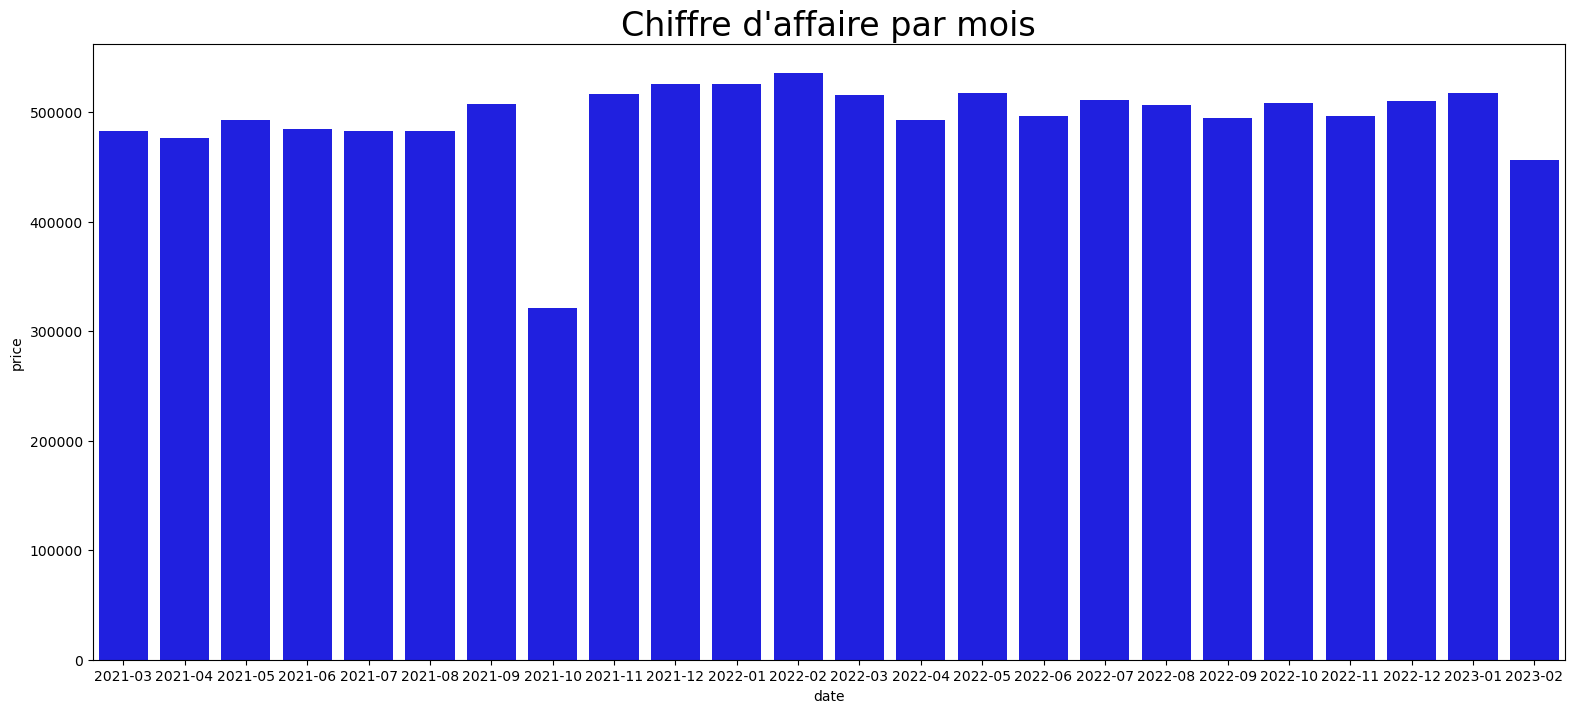

In [57]:
# group by date,année,mois puis sommes des prix
df_groupedm = transaXprodXcust.groupby(transaXprodXcust['date'].dt.strftime('%Y-%m'))['price'].sum().reset_index()

#Figure
plt.figure(figsize=(19,8)) #Changement taille graph
sns.barplot(data=df_groupedm, x='date', y='price', 
            #couleur
            color="b")
plt.title("Chiffre d'affaire par mois", size=24)
plt.show()

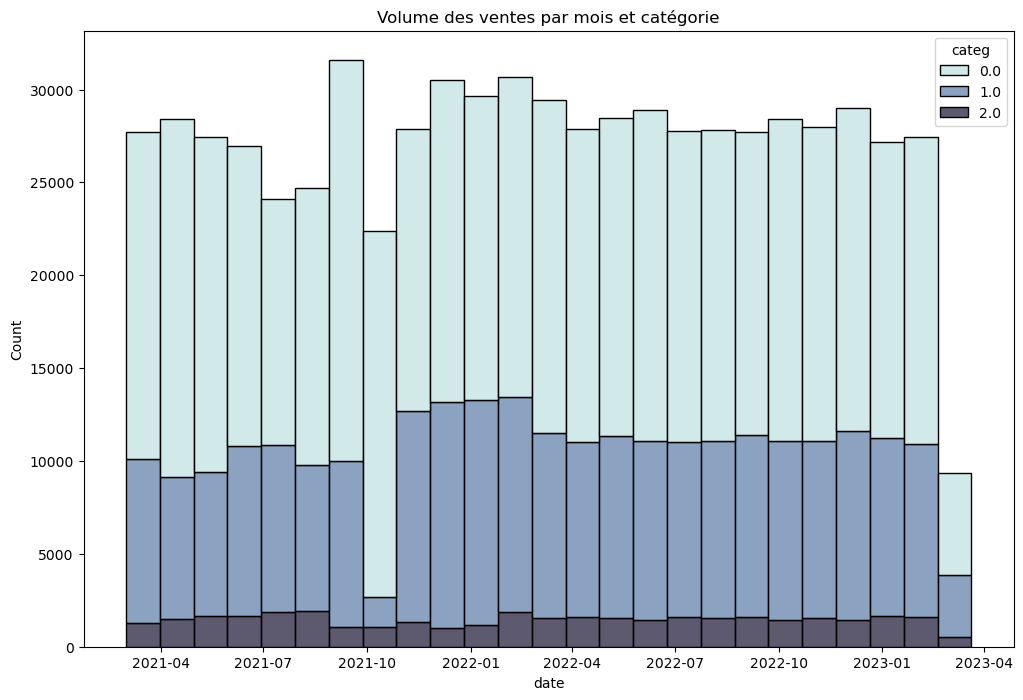

In [58]:
plt.figure(figsize=(12,8))
sns.histplot(data=transaXprodXcust, x='date',hue='categ',palette="ch:start=.2,rot=-.3",binwidth=30,multiple="stack")
plt.title('Volume des ventes par mois et catégorie')
plt.show()

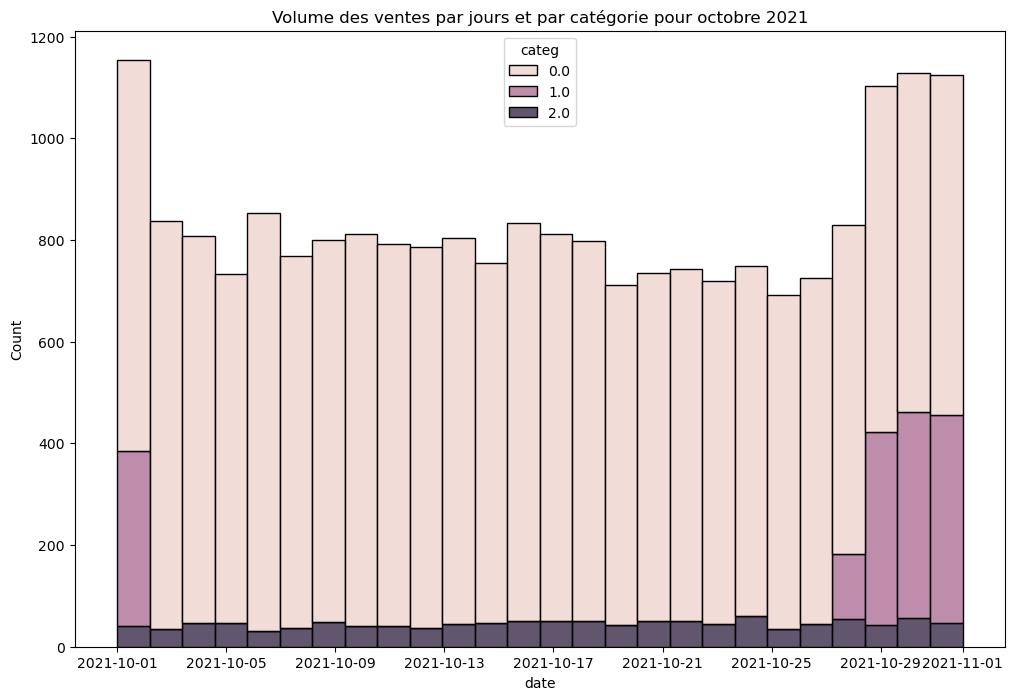

In [59]:
#Prendre seulement les dates pour definir octobre
octobre=transaXprodXcust.loc[(transaXprodXcust['date'].dt.month==10) & (transaXprodXcust['date'].dt.year==2021)] 

plt.figure(figsize=(12,8))
sns.histplot(data=transaXprodXcust, x=octobre['date'], hue='categ',multiple="stack")
plt.title('Volume des ventes par jours et par catégorie pour octobre 2021')
plt.show()

Il nous manques des données pour le mois d'octobre 2021

In [60]:
#Nombre de ligne présent dans le dataFrame
row=len(transaXprodXcust)
# Prendre les valeurs de l'index pour les lignes ou date = octobre 
rowoctobre = transaXprodXcust[(transaXprodXcust['date'].dt.month==10) & (transaXprodXcust['date'].dt.year==2021)]
octoclient=df_clients.loc[(df_clients['date'].dt.month==10) & (df_clients['date'].dt.year==2021)]
# supprimer ces lignes ou l'on à leur index du dataFrame
#transaXprodXcust.drop(rowoctobre.index, inplace=True)
#df_clients.drop(octoclient.index,inplace=True)

(row - (row-len(rowoctobre)))/ (row-len(rowoctobre)) * 100

3.2849545251366066

Les données d'octobre 2021  représente 3.28% du dataframe

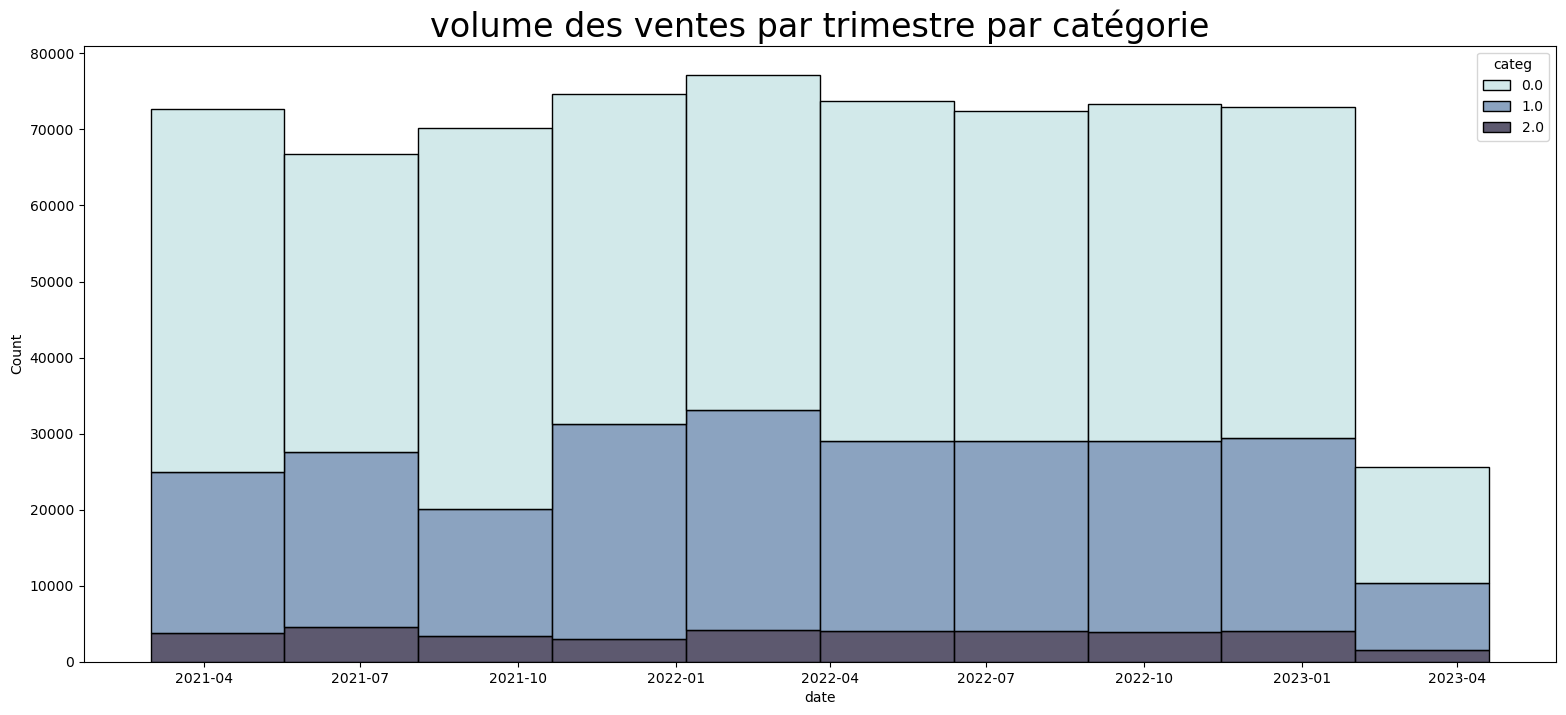

In [61]:
#Figure
plt.figure(figsize=(19,8)) #Changement taille graph
sns.histplot(data=transaXprodXcust, x='date',hue='categ',palette="ch:start=.2,rot=-.3",multiple="stack", binwidth=78)
plt.title("volume des ventes par trimestre par catégorie", size=24)
plt.show()

In [62]:
#CA par categ et par mois
df_groupedmcateg=transaXprodXcust.groupby(['date','categ'])['price'].sum().reset_index()
df_groupedmcateg=df_groupedmcateg.pivot(index='date', columns='categ',values='price').fillna(0).reset_index()
df_groupedmcateg = df_groupedmcateg.groupby(df_groupedmcateg['date'].dt.strftime('%Y-%m'))[0.0,1.0,2.0].sum().reset_index()
df_groupedmcateg

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\2743674830.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_groupedmcateg = df_groupedmcateg.groupby(df_groupedmcateg['date'].dt.strftime('%Y-%m'))[0.0,1.0,2.0].sum().reset_index()


categ     date        0.0        1.0        2.0
0      2021-03  193737.17  186974.17  101837.27
1      2021-04  205390.46  156138.35  114748.49
2      2021-05  196282.72  165893.40  130863.35
3      2021-06  168027.15  189162.04  126983.37
4      2021-07  144798.79  188523.27  149561.34
5      2021-08  167845.62  162991.38  151555.79
6      2021-09  246497.91  190613.78   70272.99
7      2021-10  199334.83   33762.32   87785.59
8      2021-11  156029.56  252910.39  107347.78
9      2021-12  206120.24  251026.75   68854.29
10     2022-01  164270.51  256267.92  104860.56
11     2022-02  183329.33  213120.64  139253.53
12     2022-03  191596.94  206485.26  117506.33
13     2022-04  175165.26  195263.97  122737.71
14     2022-05  195064.34  205532.63  116727.63
15     2022-06  184018.86  201912.06  110169.20
16     2022-07  187241.00  193969.72  129716.40
17     2022-08  177468.76  211360.09  117734.42
18     2022-09  183437.24  195379.54  115405.75
19     2022-10  187549.17  199609.66  120878.94
20     2022-11  184726.35  200427.99  111642.60
21     2022-12  180542.70  205945.71  123803.09
22     2023-01  181367.06  210104.41  126153.08
23     2023-02  162541.00  180347.24  113875.52

C:\Users\GUIGUI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GUIGUI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GUIGUI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


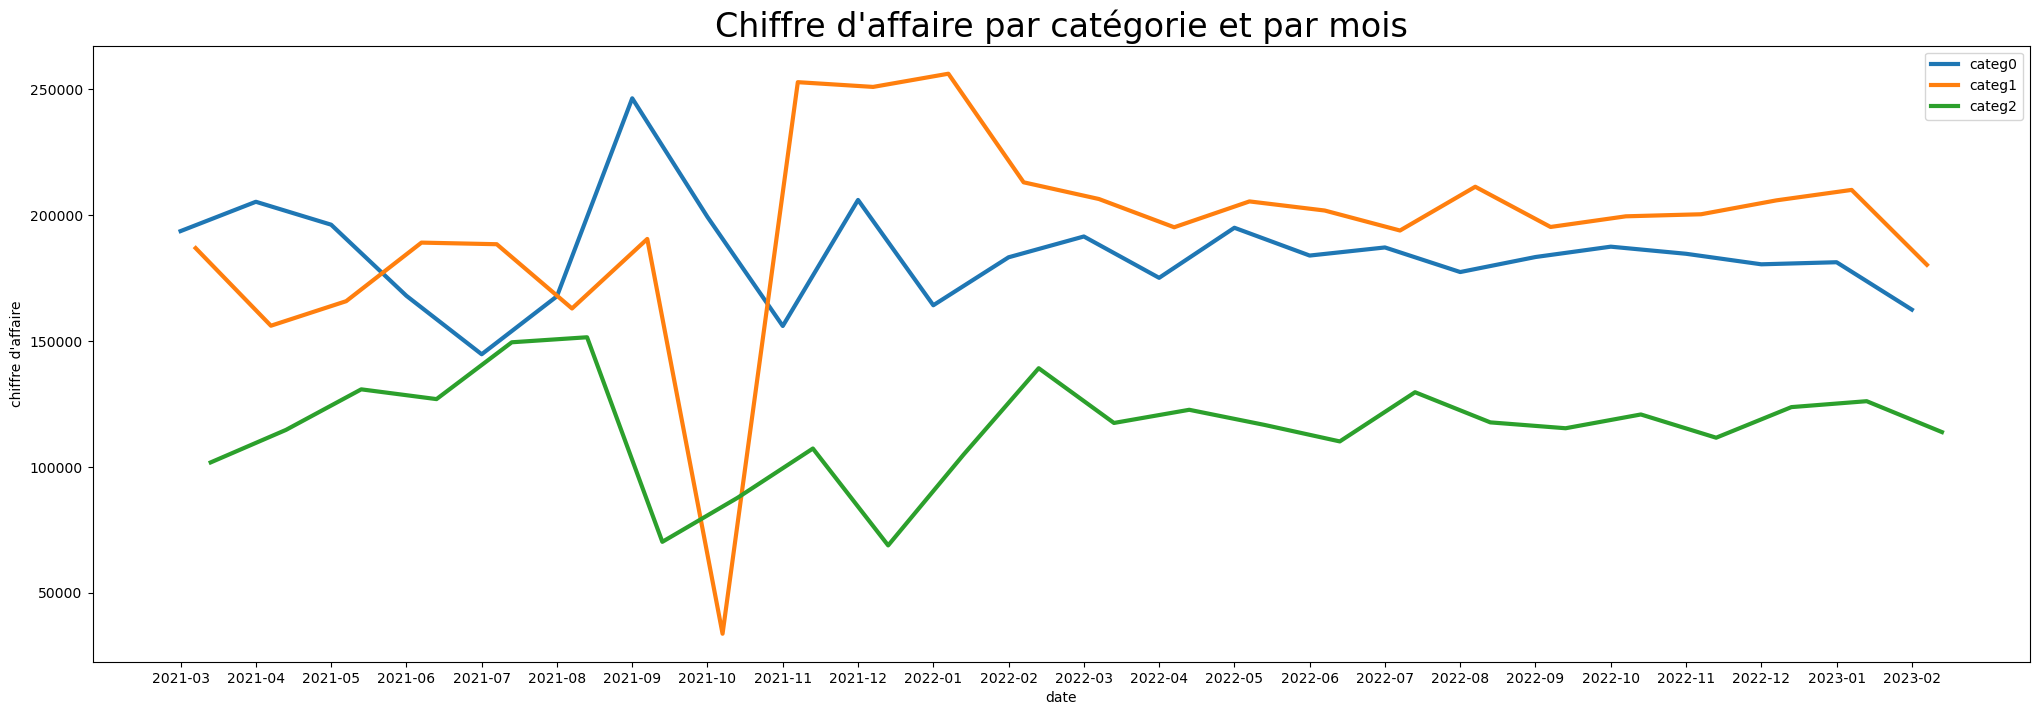

In [63]:
plt.figure(figsize=(25,8))

w=0.2
bar1=np.arange(len(df_groupedmcateg['date']))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]

sns.lineplot(bar1,df_groupedmcateg[0.0],label="categ0",palette=['g'],linewidth=3)
sns.lineplot(bar2,df_groupedmcateg[1.0],label="categ1",palette=['r'],linewidth=3)
sns.lineplot(bar3,df_groupedmcateg[2.0],label="categ2", palette=['b'],linewidth=3)

plt.ylabel("chiffre d'affaire")
plt.xlabel('date')
plt.xticks(bar1,df_groupedmcateg['date'])
plt.title("Chiffre d'affaire par catégorie et par mois", size=24)
plt.legend()
plt.show()

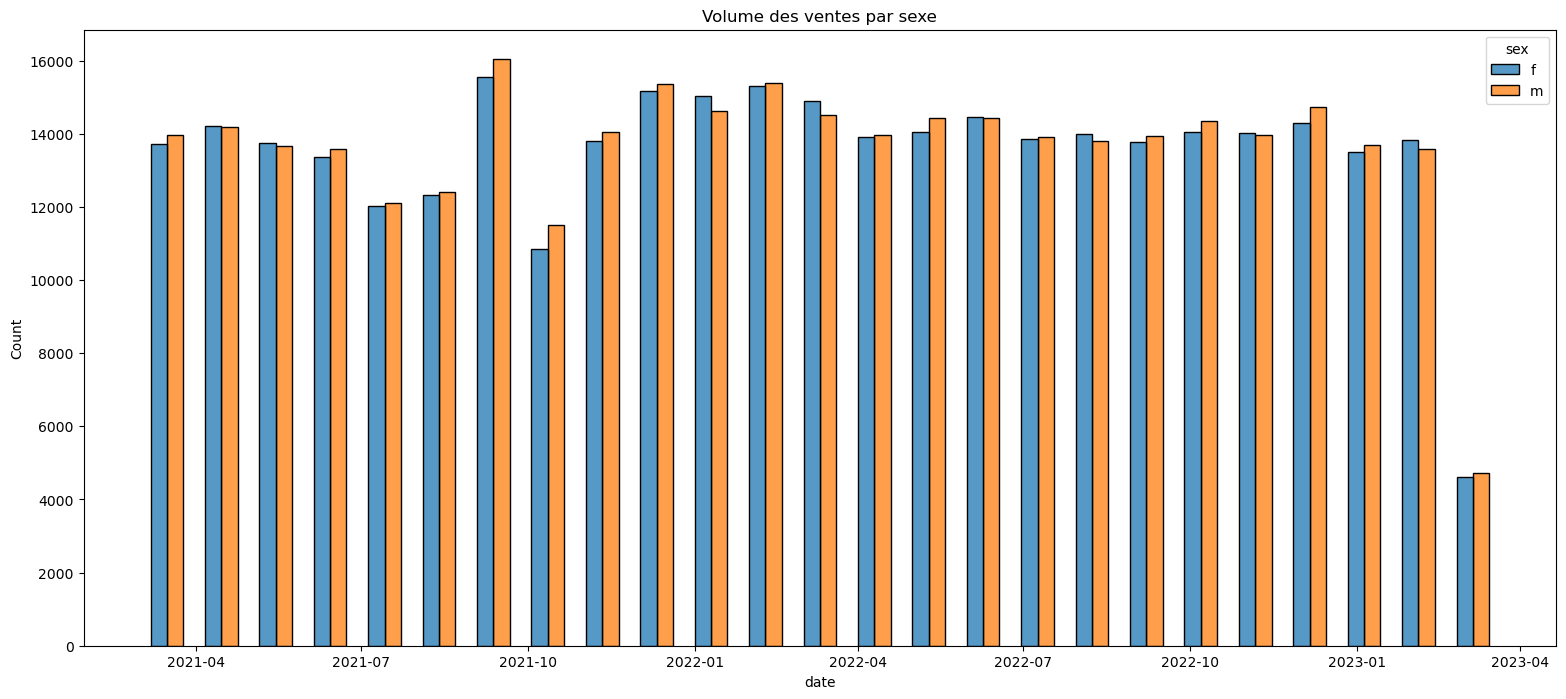

In [64]:
plt.figure(figsize=(19,8))
sns.histplot(data=transaXprodXcust, x="date", hue='sex',multiple="dodge", binwidth=30,shrink=0.6)
plt.title('Volume des ventes par sexe')
plt.show()

In [65]:
CAsex=transaXprodXcust.groupby(by='sex')['price'].sum().reset_index()
CAsex

print('Les femmes représentent',round(CAsex['price'][0]*100/(CAsex['price'][0]+CAsex['price'][1]),2),'% de notre CA')
print('Les hommes représentent',round(CAsex['price'][1]*100/(CAsex['price'][0]+CAsex['price'][1]),2),'% de notre CA')

Les femmes représentent 49.43 % de notre CA
Les hommes représentent 50.57 % de notre CA


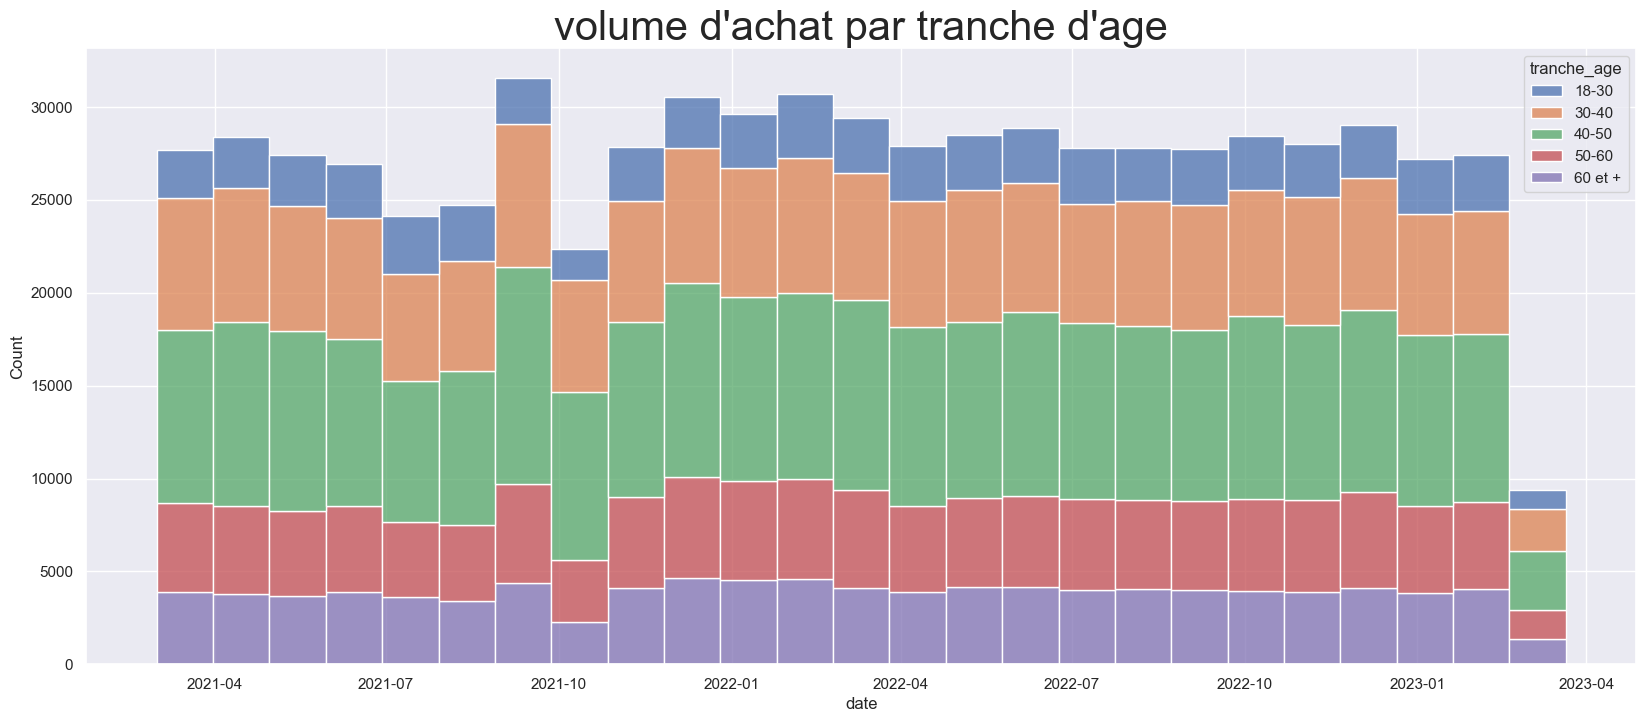

In [66]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
sns.histplot(data=transaXprodXcust.sort_values(by='tranche_age'), x='date', hue='tranche_age',multiple="stack", binwidth=30)
plt.title("volume d'achat par tranche d'age", size=30)
plt.show()

In [67]:
#Chiffre d'affaire total
CA=transaXprodXcust['price'].sum()
print("Notre chiffre d'affaire est de :",round(CA),"€")

Notre chiffre d'affaire est de : 11856381 €


In [68]:
#Chiffre d'affaire par catégorie
trancat=transaXprodXcust.groupby(by='categ')['price'].sum().reset_index()
trancat

categ       price
0    0.0  4422382.97
1    1.0  4653722.69
2    2.0  2780275.02

In [69]:
#moyenne des prix des categs
trancatmean=transaXprodXcust.groupby(by='categ')['price'].mean().reset_index()
trancatmean

categ      price
0    0.0  10.638912
1    1.0  20.485730
2    2.0  76.207412

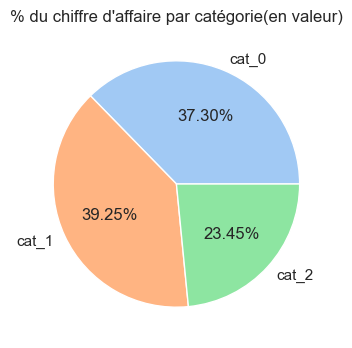

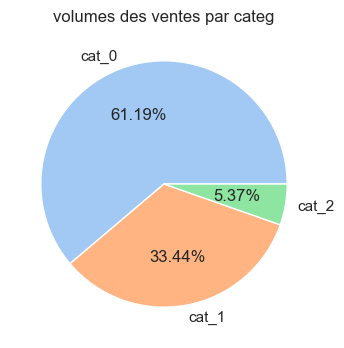

In [70]:
#Figure 1
plt.figure(figsize=(4,4))

data=transaXprodXcust.groupby(by='categ')['price'].sum()
labels=['cat_0','cat_1','cat_2']

colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels=labels, colors=colors,autopct = '%0.2f%%')
plt.title("% du chiffre d'affaire par catégorie(en valeur)")

plt.show()

#Figure 2

plt.figure(figsize=(4,4))

datas=transaXprodXcust.groupby(by='categ')['date'].count()
labels=['cat_0','cat_1','cat_2']

colors = sns.color_palette('pastel')[0:5]
plt.pie(datas, labels=labels, colors=colors,autopct = '%0.2f%%')
plt.title("volumes des ventes par categ")

plt.show()

In [71]:
#groupby sur l'id pour avoir une idée des ventes
tranprod=transaXprodXcust.groupby(['id_prod'])['nombre_achat','price'].sum().reset_index().rename(columns={'price': "chifffre_daffaire"})
tranprod['% CA'] = (tranprod['chifffre_daffaire']*100) / tranprod['chifffre_daffaire'].sum()
#Les flops
tranprod=tranprod.sort_values(by="chifffre_daffaire")
tranprod.head(10)

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\1210389628.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tranprod=transaXprodXcust.groupby(['id_prod'])['nombre_achat','price'].sum().reset_index().rename(columns={'price': "chifffre_daffaire"})


id_prod  nombre_achat  chifffre_daffaire      % CA
595   0_1539           267               0.99  0.000008
313   0_1284           158               1.38  0.000012
719   0_1653           254               1.98  0.000017
1785   0_541           177               1.99  0.000017
2080   0_807            49               1.99  0.000017
665   0_1601            63               1.99  0.000017
802   0_1728           202               2.27  0.000019
549   0_1498           276               2.48  0.000021
2180   0_898           190               2.54  0.000021
925   0_1840           264               2.56  0.000022

In [72]:
#Les tops
tranprod=tranprod.sort_values(by='chifffre_daffaire', ascending=False)
tranprod.head(10)

id_prod  nombre_achat  chifffre_daffaire      % CA
3097   2_159        457499           94893.50  0.800358
3071   2_135        510956           69334.95  0.584790
3046   2_112        604331           65407.76  0.551667
3035   2_102        530146           60736.78  0.512271
3153   2_209        522116           56971.86  0.480516
2620   1_395       2187309           54356.25  0.458456
2592   1_369       2286830           54025.48  0.455666
3044   2_110        563210           53846.25  0.454154
3202    2_39        546174           53060.85  0.447530
3105   2_166        111537           52449.12  0.442370

## Saisonnalité  <a class="anchor" id="saisonnalité"></a>

L’objectif principal de l’analyse d’une série temporelle est la prévision de ses futures réalisations en se basant 
sur ses valeurs passées **Y(t) est notre série temporelle**, elle ce décompose en **tendance T(t), saisonnalité S(t) et bruit e(t)**

Y[t] = T[t] + S[t] + e[t]


In [73]:
df_groupedj = transaXprodXcust.groupby(transaXprodXcust['date'].dt.strftime('%Y-%m-%d'))['price'].sum().reset_index()
df_groupedj['date']=pd.to_datetime(df_groupedj['date'])

In [74]:
#Nous allons prendre notre saisonnalité sur 31 jours
s= sm.tsa.seasonal_decompose(df_groupedj.price, period=31, extrapolate_trend=1)

<Figure size 640x480 with 0 Axes>

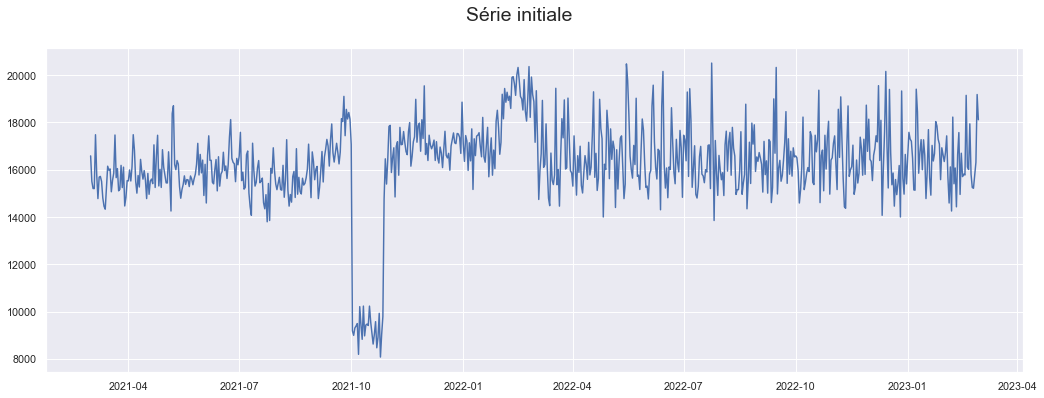

In [75]:
fig = plt.figure()
plt.figure(figsize = (18,6), dpi=70).suptitle("Série initiale", fontsize=20)
plt.plot(df_groupedj.date, df_groupedj.price)

<Figure size 640x480 with 0 Axes>

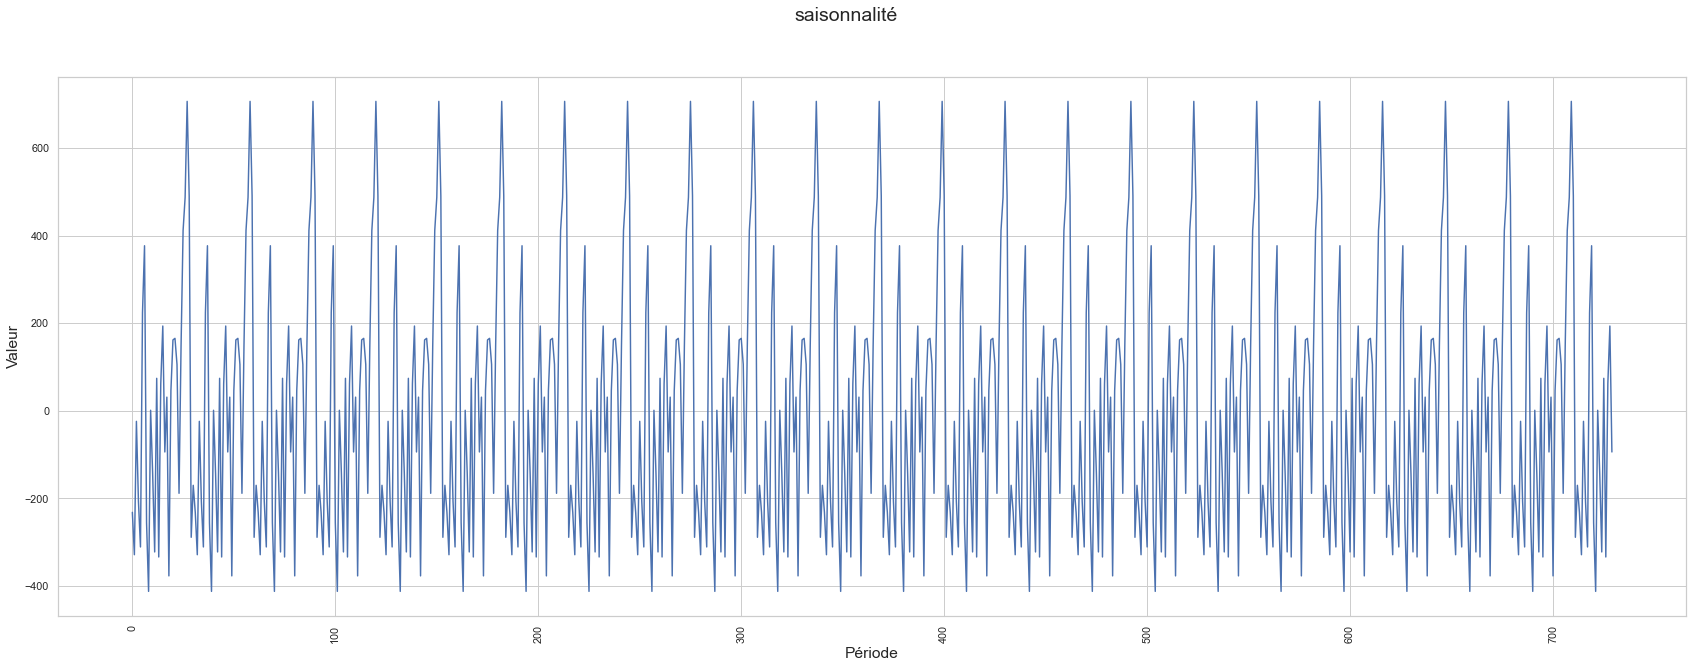

<Figure size 640x480 with 0 Axes>

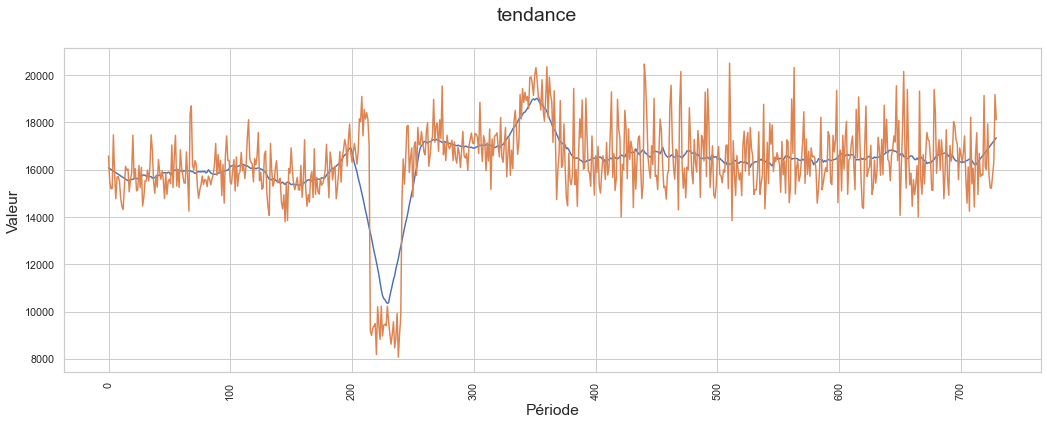

<Figure size 640x480 with 0 Axes>

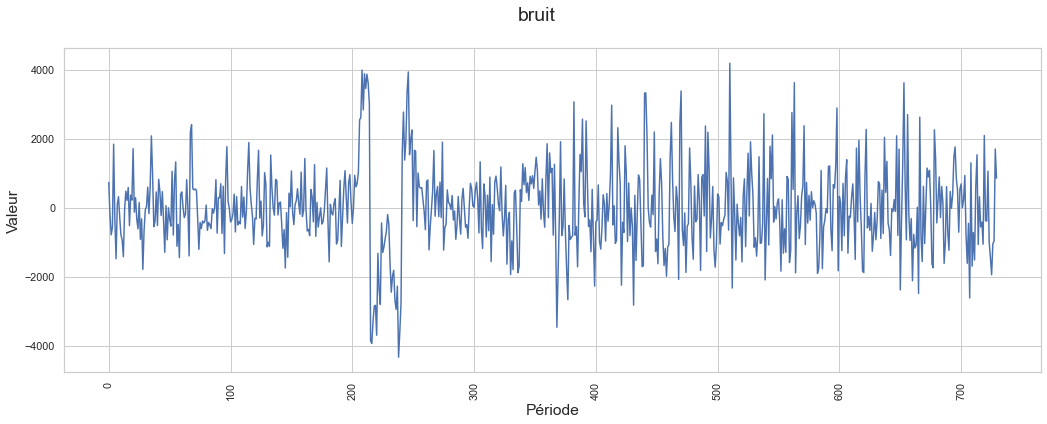

In [125]:
fig = plt.figure()
plt.figure(figsize = (30,10), dpi=70).suptitle("saisonnalité", fontsize=20)
plt.plot(s.seasonal)
plt.xticks(rotation=90)
plt.xlabel("Période", fontsize=16)
plt.ylabel("Valeur", fontsize=16)
plt.show()

#Represente l'évolution a long terme 
fig = plt.figure()
plt.figure(figsize = (18,6), dpi=70).suptitle("tendance", fontsize=20)
plt.plot(s.trend)
plt.plot(s.observed)
plt.xticks(rotation=90)
plt.xlabel("Période", fontsize=16)
plt.ylabel("Valeur", fontsize=16)
plt.show()

fig = plt.figure()
plt.figure(figsize = (18,6), dpi=70).suptitle("bruit", fontsize=20)
plt.plot(s.resid)
plt.xticks(rotation=90)
plt.xlabel("Période", fontsize=16)
plt.ylabel("Valeur", fontsize=16)
plt.show()

L'enjeu est de trouver une moyenne mobile qui laisse la tendance invariante, qui absorbe la saisonnalité et qui réduit le résidu : pour ce faire voila comment j'ai procéder:

1.Réalisation de plusieurs graphiques de l'évolution du chiffre d'affaire par ans par mois et par jour et aucune periodicité 
ne s'en dégage. Par conséquent et pour choisir la périodicité à appliquer sur ma série temporelle avec la méthode des moyennes mobiles j'ai de nouveau procédé par tatonnement en analysant les graphiques décomposant la série initiale par sa tendance, sa saisonnalité et son résidus.

Comme indiqué dans le cours, l'enjeu est de trouver une moyenne mobile qui laisse la tendance invariante, qui absorbe la saisonnalité et qui réduit le résidu 

J'ai donc terminé sur 31 jours 

In [77]:
#Figure
px.scatter(df_groupedj, 
           x='date',
           y='price', 
           color="price" , 
           opacity=0.30, 
           trendline='rolling',
           trendline_options=dict(window=31),
           title="Moyenne mobile à 31 points",
           color_continuous_scale='twilight')

# Analyse des clients <a class="anchor" id="analyse_clients"></a>

Nous pouvons voir qu'il y a 4 clients qui sortent du lot, ce sont surement des clients **professionels**

Nous allons differencier les clients pro des particuliers

In [78]:
#Deux variables differentes : client pro et une client particulier
df_clients['type_client'] ='B2C'
#Pour tout client ayant un chiffre d'affaire > 50 000 alors c'est un pro
df_clients['type_client'].loc[df_clients[df_clients['chiffre_daffaire']>50000].index]='B2B'

B2C = df_clients[df_clients['type_client']=='B2C'] #dataFrame B2C
B2B = df_clients[df_clients['type_client']=='B2B'] #Dataframe B2B

df_clients.sort_values(by='chiffre_daffaire', ascending=False)
df_clients.head(10)



C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\1614346666.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id_prod                       date session_id client_id  price  categ  \
4607    0_1518 2022-04-27 17:10:40.102676   s_200245    c_1609   4.18    0.0   
98225    1_251 2021-08-21 18:21:28.292701    s_78847    c_4958  15.99    1.0   
30476   0_1518 2021-05-09 11:52:55.100386    s_32104    c_6714   4.18    0.0   
41139   0_1518 2022-05-09 17:15:39.672677   s_206037    c_3454   4.18    0.0   
191791  0_1509 2021-04-17 05:39:50.728094    s_21722    c_3263   4.99    0.0   
167553  0_1509 2022-03-03 21:08:39.493271   s_173904    c_1570   4.99    0.0   
355649   1_281 2021-06-28 23:31:04.850771    s_55253    c_2899  23.99    1.0   
232845  0_1418 2021-03-22 21:19:03.049709    s_10063    c_2140   8.57    0.0   
462268  0_1100 2021-05-21 10:44:27.793984    s_37476    c_7319   3.03    0.0   
275666  0_1475 2021-07-11 18:38:33.308212    s_60966    c_8026  11.99    0.0   

       sex   birth  chiffre_daffaire  nombre_achat  frequence_achat  \
4607     m  1980.0         324033.35         25488           2317.0   
98225    m  1999.0         289760.34          5195            472.0   
30476    f  1968.0         153670.92          9187            835.0   
41139    m  1969.0         113673.93          6773            616.0   
191791   f  1985.0           5276.87           403             37.0   
167553   f  1979.0           5271.62           369             34.0   
355649   f  1994.0           5214.05           105             10.0   
232845   f  1977.0           5208.82           402             37.0   
462268   f  1974.0           5155.77           371             34.0   
275666   m  1978.0           5094.58           377             34.0   

        panier_moyen  nbsession  taille_panier_moyen  achat_cat0  achat_cat1  \
4607           12.71      10997                 2.32     20167.0      5310.0   
98225          55.78       3851                 1.35         4.0      1888.0   
30476          16.73       2620                 3.51      5316.0      3568.0   
41139          16.78       5573                 1.22      2700.0      4055.0   
191791         13.09        143                 2.82       314.0        89.0   
167553         14.29        158                 2.34       260.0       108.0   
355649         49.66         69                 1.52         3.0        41.0   
232845         12.96        147                 2.73       310.0        91.0   
462268         13.90        145                 2.56       274.0        96.0   
275666         13.51        146                 2.58       300.0        77.0   

        achat_cat2   age tranche_age type_client  
4607          11.0  43.0       40-50         B2B  
98225       3303.0  24.0       18-30         B2B  
30476        303.0  55.0       50-60         B2B  
41139         18.0  54.0       50-60         B2B  
191791         0.0  38.0       30-40         B2C  
167553         1.0  44.0       40-50         B2C  
355649        61.0  29.0       18-30         B2C  
232845         1.0  46.0       40-50         B2C  
462268         1.0  49.0       40-50         B2C  
275666         0.0  45.0       40-50         B2C

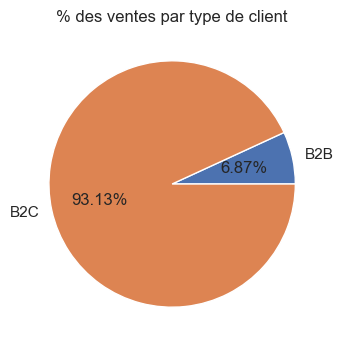

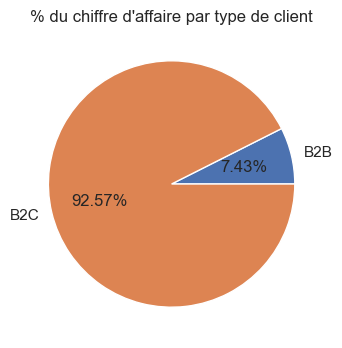

In [79]:
#Figure 1
plt.figure(figsize=(4,4))

data=df_clients.groupby('type_client')['nombre_achat'].sum()
labels=['B2B','B2C']
plt.pie(data, labels=labels,autopct = '%0.2f%%')
plt.title("% des ventes par type de client")

plt.show()

#Figure 2 
plt.figure(figsize=(4,4))

data=df_clients.groupby('type_client')['chiffre_daffaire'].sum()
labels=['B2B','B2C']
plt.pie(data, labels=labels,autopct = '%0.2f%%')
plt.title("% du chiffre d'affaire par type de client")
plt.show()

Les clients professionnels représente **6.87%** des transactions et **7.43%** du chiffre d'affaire

De ce faite, je les écarterais de nos analyses à venir pour ne pas fausser les résultats

## lorenz <a class="anchor" id="lorenz"></a>

L'indice de gini mesure l'air entre la bissectrice et la courbe de lorenz.

Elle varie de 0 (égalité parfaite) à 1 (1 client detient la totalité du chiffre d'affaire)

Incide de Gini : 0.4463968523106523


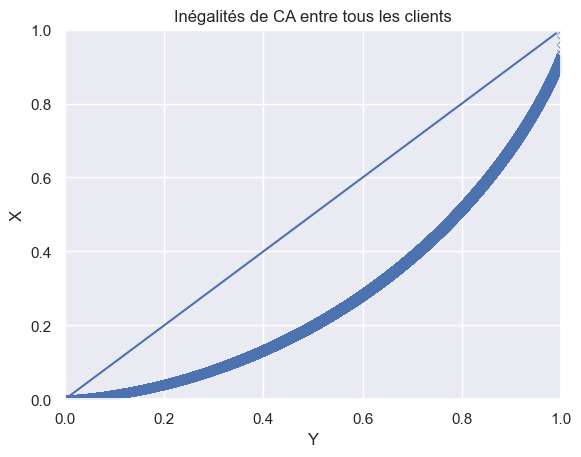

In [80]:
# Courbe de Lorenz
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)
    
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    y = np.arange(X_lorenz.size)/(X_lorenz.size-1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0,1,.01)
    x = a
    y = a
    
     # Indice de Gini
    def gini(array):
        array
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_array)])
        return coef_*weighted_sum/(sorted_array.sum()) - const_
    print('Incide de Gini :', gini(X))
   
    # Graphique
    sns.lineplot(x=x,y=y)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.title(title)
    plt.show()
    
# Inégalité des chiffres d'affaires annuels de tous les clients
lorenz(df_clients["chiffre_daffaire"], 'Inégalités de CA entre tous les clients')

Nous pouvons voir ici que les 4 pro représenter en haut par des croix

Incide de Gini : 0.4026328672097401


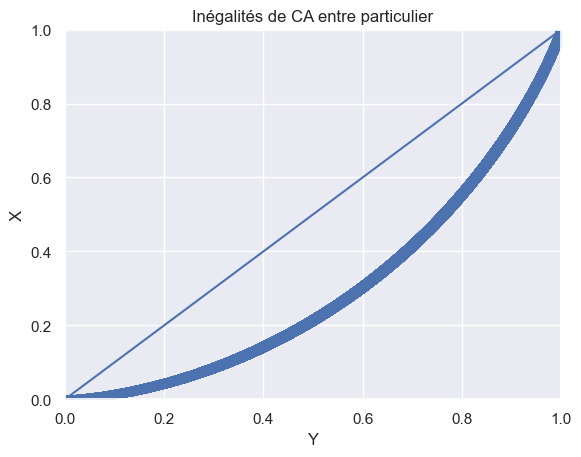

In [81]:
lorenz(B2C["chiffre_daffaire"], 'Inégalités de CA entre particulier')

L'indice de Gini est plus faible et donc l'inégalité est reduite sans les clients pro

## Client Pro <a class="anchor" id="analyse_clientpro"></a>

In [82]:
B2B_transa= transaXprodXcust.copy()
#Deux variables differentes : client pro et une client particulier
B2B_transa['type_client'] ='B2C'
#Pour tout client ayant un chiffre d'affaire > 50 000 alors c'est un pro
B2B_transa['type_client'].loc[B2B_transa[B2B_transa['chiffre_daffaire']>50000].index]='B2B'

B2C_=B2B_transa[B2B_transa['type_client']=='B2C'] #dataFrame B2C
B2B_= B2B_transa[B2B_transa['type_client']=='B2B'] #Dataframe B2B

C:\Users\GUIGUI\AppData\Local\Temp\ipykernel_37772\1588714673.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
B2B.head()

id_prod                       date session_id client_id  price  categ  \
4607   0_1518 2022-04-27 17:10:40.102676   s_200245    c_1609   4.18    0.0   
98225   1_251 2021-08-21 18:21:28.292701    s_78847    c_4958  15.99    1.0   
30476  0_1518 2021-05-09 11:52:55.100386    s_32104    c_6714   4.18    0.0   
41139  0_1518 2022-05-09 17:15:39.672677   s_206037    c_3454   4.18    0.0   

      sex   birth  chiffre_daffaire  nombre_achat  frequence_achat  \
4607    m  1980.0         324033.35         25488           2317.0   
98225   m  1999.0         289760.34          5195            472.0   
30476   f  1968.0         153670.92          9187            835.0   
41139   m  1969.0         113673.93          6773            616.0   

       panier_moyen  nbsession  taille_panier_moyen  achat_cat0  achat_cat1  \
4607          12.71      10997                 2.32     20167.0      5310.0   
98225         55.78       3851                 1.35         4.0      1888.0   
30476         16.73       2620                 3.51      5316.0      3568.0   
41139         16.78       5573                 1.22      2700.0      4055.0   

       achat_cat2   age tranche_age type_client  
4607         11.0  43.0       40-50         B2B  
98225      3303.0  24.0       18-30         B2B  
30476       303.0  55.0       50-60         B2B  
41139        18.0  54.0       50-60         B2B

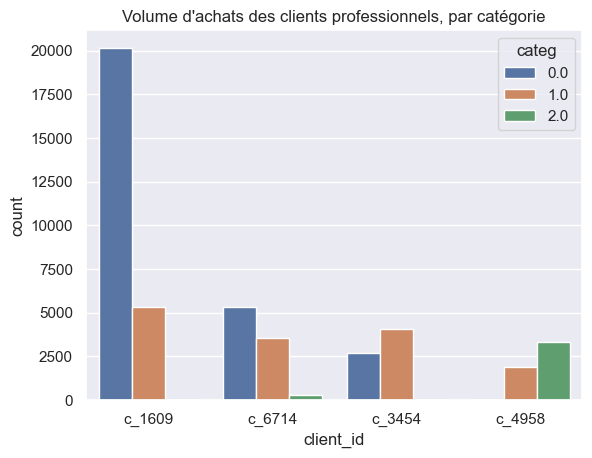

In [84]:
sns.countplot(data=B2B_, x='client_id', hue='categ')
plt.title("Volume d'achats des clients professionnels, par catégorie")
plt.show()

### Analyse du Chiffre d'affaire <a class="anchor" id="analyse_ca_pro"></a>

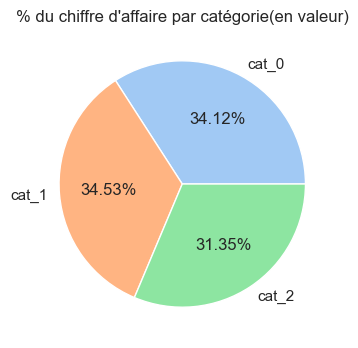

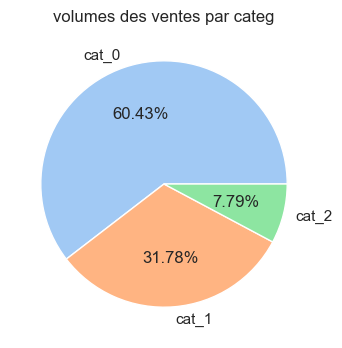

In [85]:
#Figure 1
plt.figure(figsize=(4,4))

datab2b=B2B_.groupby(by='categ')['price'].sum()
labels=['cat_0','cat_1','cat_2']

colors = sns.color_palette('pastel')[0:5]
plt.pie(datab2b, labels=labels, colors=colors,autopct = '%0.2f%%')
plt.title("% du chiffre d'affaire par catégorie(en valeur)")

plt.show()

#Figure 2
plt.figure(figsize=(4,4))

datab2cs=B2B_.groupby(by='categ')['date'].count()
labels=['cat_0','cat_1','cat_2']

colors = sns.color_palette('pastel')[0:5]
plt.pie(datab2cs, labels=labels, colors=colors,autopct = '%0.2f%%')
plt.title("volumes des ventes par categ")

plt.show()

## Client particulier <a class="anchor" id="client_parti"></a>

### analyse du Chiffre d'affaire <a class="anchor" id="ca_clientparti"></a>

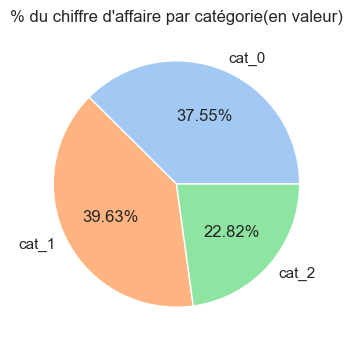

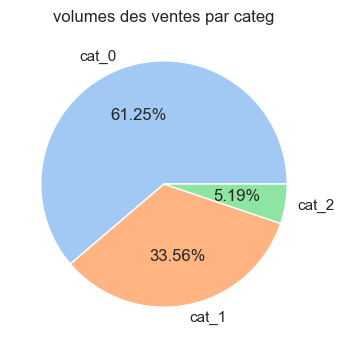

In [86]:
#Figure1
plt.figure(figsize=(4,4))

datab2c=B2C_.groupby(by='categ')['price'].sum()
labels=['cat_0','cat_1','cat_2']

colors = sns.color_palette('pastel')[0:5]
plt.pie(datab2c, labels=labels, colors=colors,autopct = '%0.2f%%')
plt.title("% du chiffre d'affaire par catégorie(en valeur)")

plt.show()

#Figure2
plt.figure(figsize=(4,4))

datab2cs=B2C_.groupby(by='categ')['date'].count()
labels=['cat_0','cat_1','cat_2']

colors = sns.color_palette('pastel')[0:5]
plt.pie(datab2cs, labels=labels, colors=colors,autopct = '%0.2f%%')
plt.title("volumes des ventes par categ")

plt.show()

### Analyse par sexe <a class="anchor" id="analyse_sex"></a>

In [87]:
print(B2C['sex'].value_counts())
print("soit" ,round((B2C[B2C['sex']=='f']['age'].count() * 100) / (B2C[B2C['sex']=='f']['age'].count()+B2C[B2C['sex']=='m']['age'].count()),2),"% de femmes")
print("soit" ,round((B2C[B2C['sex']=='m']['age'].count() * 100) / (B2C[B2C['sex']=='m']['age'].count()+B2C[B2C['sex']=='f']['age'].count()),2),"% d'hommes")

f    4478
m    4118
Name: sex, dtype: int64
soit 52.09 % de femmes
soit 47.91 % d'hommes


Il y a une bonne égalité des sexes

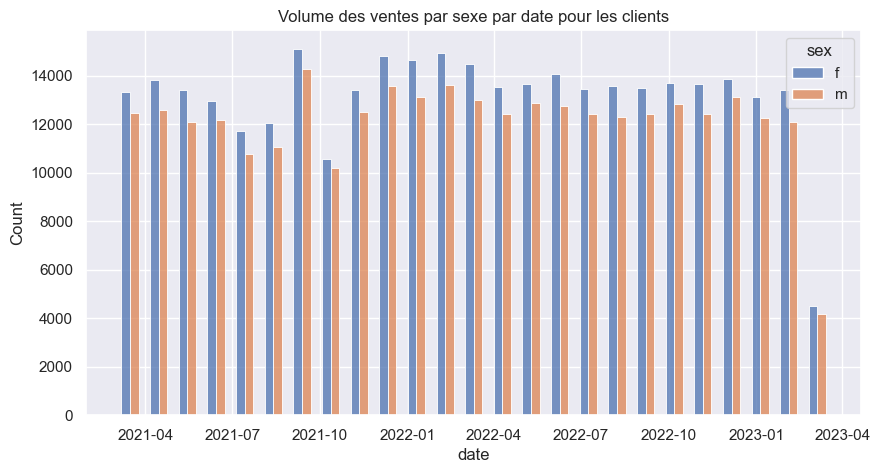

In [88]:
plt.figure(figsize=(10,5))
sns.histplot(data=B2C_, x='date', hue='sex',multiple="dodge",binwidth=30,shrink=0.6)
plt.title("Volume des ventes par sexe par date pour les clients")
plt.show()

In [89]:
CAsexB2C=B2C.groupby(by='sex')['price'].sum().reset_index()
CAsexB2C

print('Les femmes représentent',round(CAsexB2C['price'][0]*100/(CAsexB2C['price'][0]+CAsexB2C['price'][1]),2),'% de notre CA')
print('Les hommes représentent',round(CAsexB2C['price'][1]*100/(CAsexB2C['price'][0]+CAsexB2C['price'][1]),2),'% de notre CA')

Les femmes représentent 52.24 % de notre CA
Les hommes représentent 47.76 % de notre CA


Pour le B2C , ce sont les femmes qui ont un peu plus de vente, mais cela reste assez égalitaire

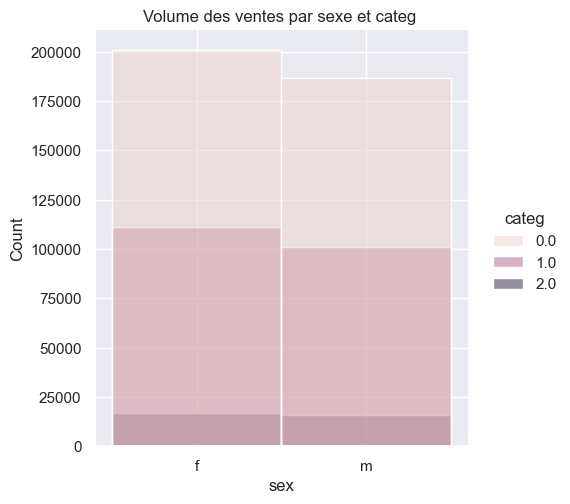

In [90]:
sns.displot(data=B2C_, x='sex', hue='categ')
plt.title("Volume des ventes par sexe et categ ")
plt.show()

Meme remarque ici, la difference est trés fine entre les ventes H/F par catégorie.

### Analyse par âge <a class="anchor" id="analyse_age_clientparti"></a>

<Figure size 800x700 with 0 Axes>

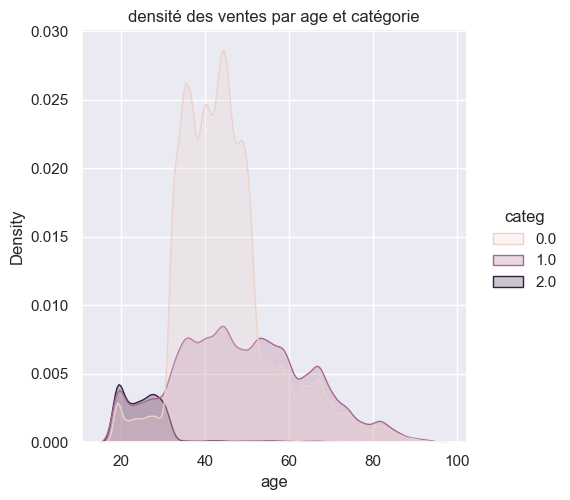

In [91]:
plt.figure(figsize=(8,7))
sns.displot(data=B2C_, x='age', hue='categ', kind='kde', fill=True)
plt.title('densité des ventes par age et catégorie')
plt.show()

Les catégories sont acheter par tout les age.

La catégorie 2 est plus acheté par les 18-30 ans

La catégorie 0 est quasiment acheté par les 30-50 ans

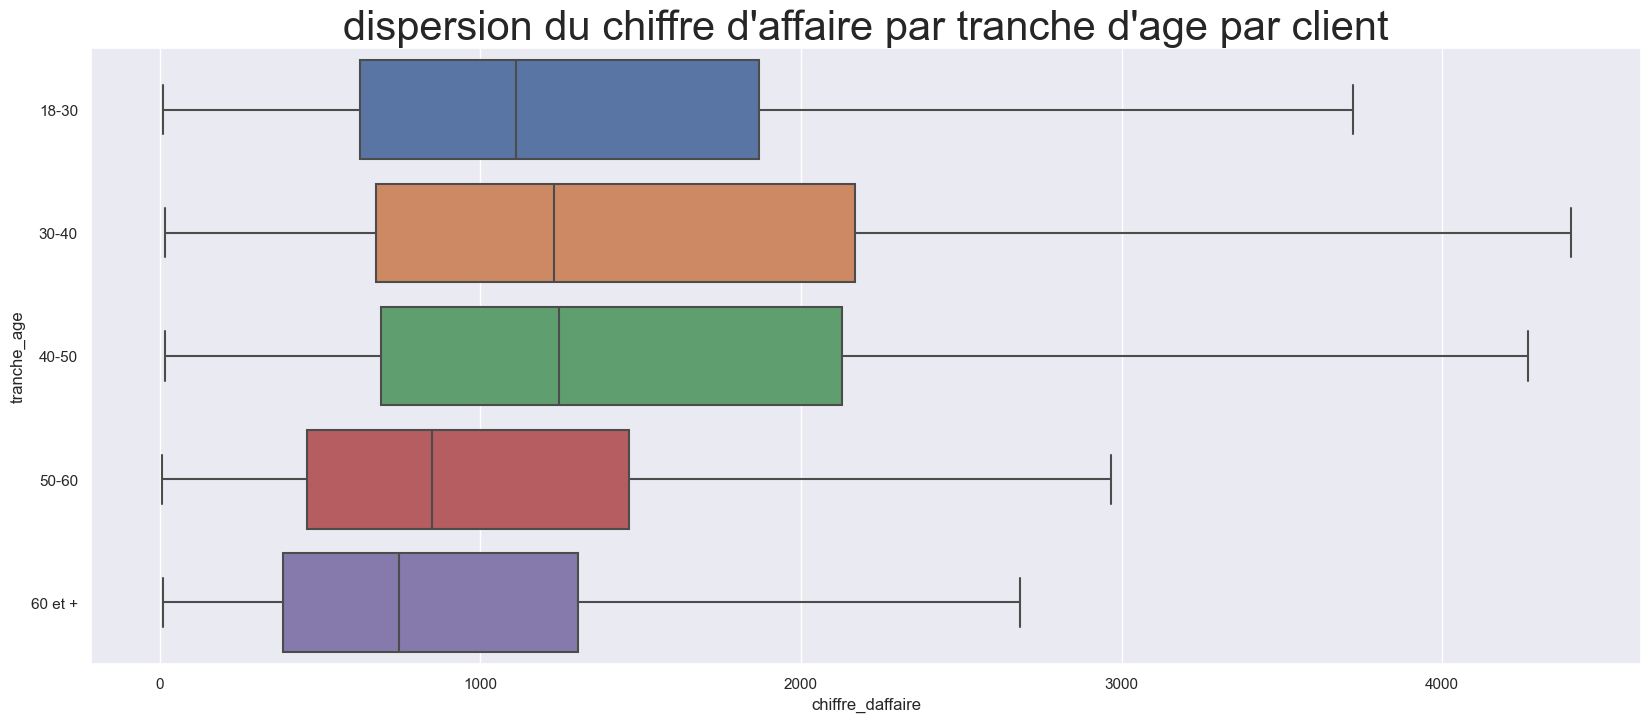

In [92]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
sns.boxplot(data=B2C.sort_values(by='tranche_age'),x='chiffre_daffaire',y='tranche_age', showfliers=False)
plt.title("dispersion du chiffre d'affaire par tranche d'age par client", size=30)
plt.show()

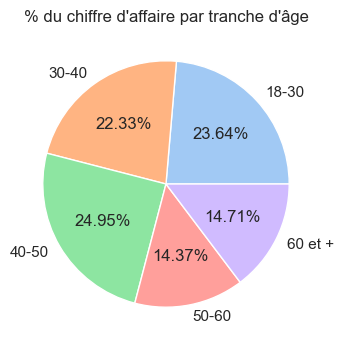

In [93]:
plt.figure(figsize=(4,4))

datab2c=B2C_.groupby(by='tranche_age')['price'].sum()
labels=['18-30','30-40','40-50','50-60','60 et +']

colors = sns.color_palette('pastel')[0:5]
plt.pie(datab2c, labels=labels, colors=colors,autopct = '%0.2f%%')
plt.title("% du chiffre d'affaire par tranche d'âge")
plt.show()

Les **30-50 ans** ont un chiffre d'affaire plus elevé suivis de prés par les 18-30 ans

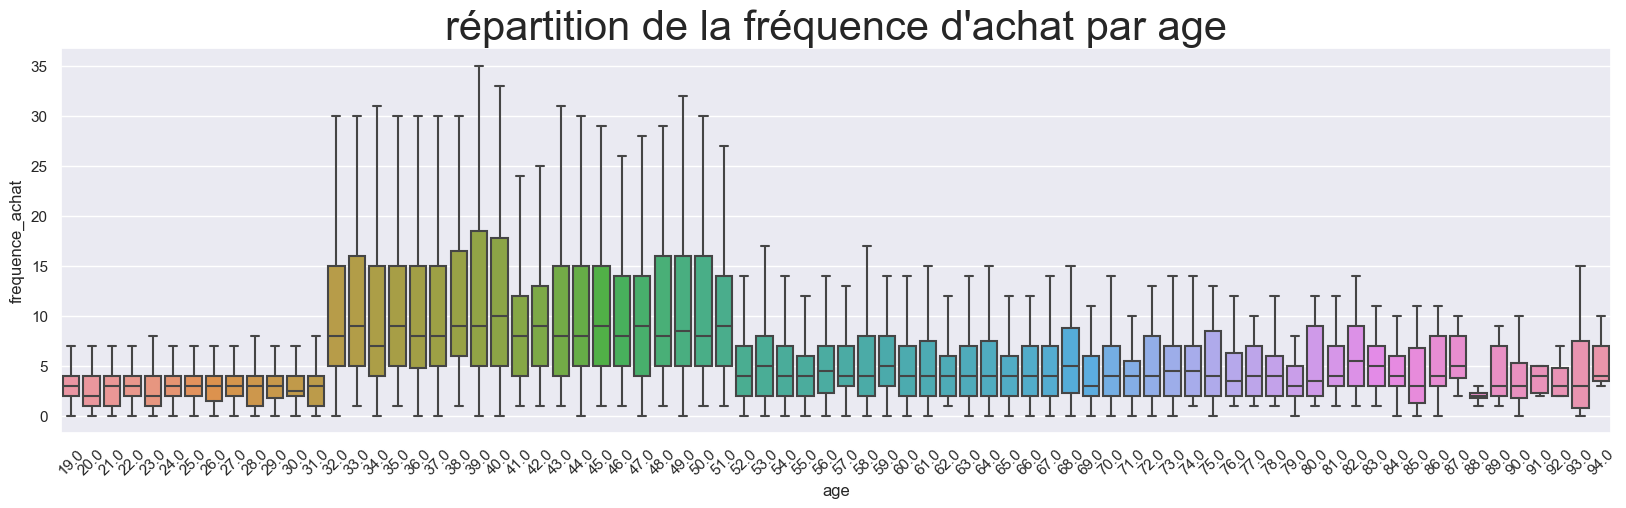

In [94]:
plt.figure(figsize=(20,5))
sns.boxplot(data=B2C ,y='frequence_achat' ,x='age' ,showfliers=False)
plt.xticks(rotation=45)
plt.title("répartition de la fréquence d'achat par age", size=30)
plt.show()

Les **18-30 ans** achetent le meme nombre de livres environs 3 livres par mois

Les **30-50 ans** ont une fréquence d'achat plus elever et prennent 8 livre par mois

les **50-80 ans** ont des fréquence d'achat plus varié mais sont generalement au alentour des 5 livres acheter par mois

les **80+** n'ont pas d'habitude particuliere 

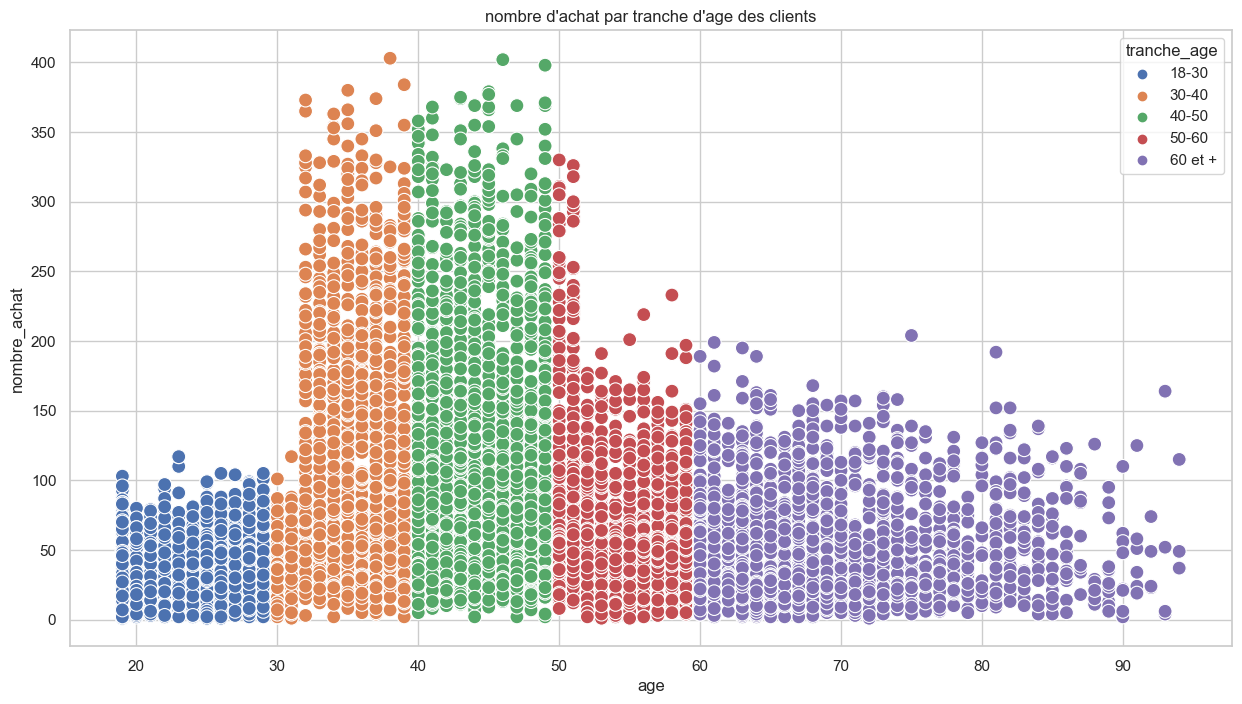

In [95]:
#Figure lien entre l'âge et le nombre d'achat
plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.scatterplot(data=B2C.sort_values(by='tranche_age'), x="age", y="nombre_achat", hue='tranche_age',s=100)
plt.title("nombre d'achat par tranche d'age des clients")
plt.show()

Les **18-30** ans ne dépasse pas la barre des 100 achats

Les **30-50** ans sont les plus grand consommateur, avec un nombre d'achat bien plus elever que les autres tranches d'age

les **50+** sont en deuxieme position

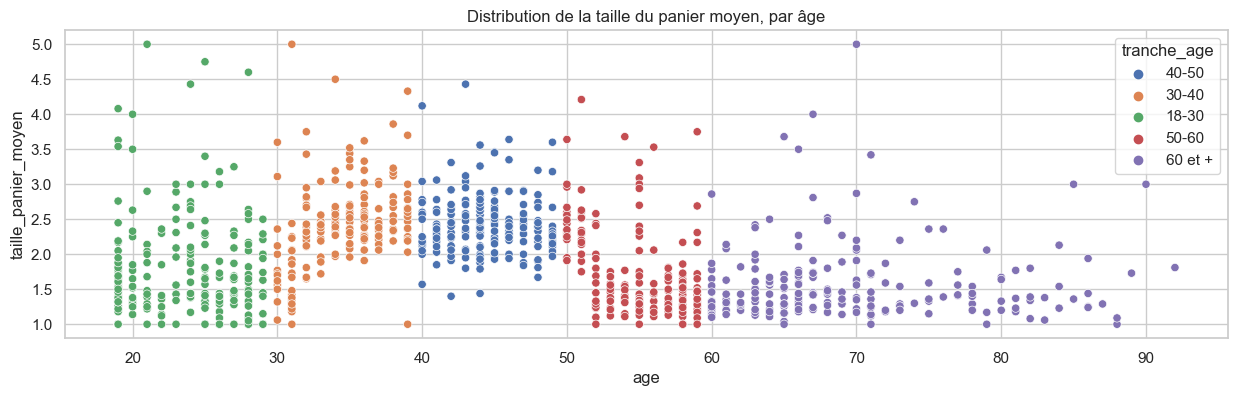

In [96]:
plt.figure(figsize=(15,4))
sns.scatterplot(data=B2C.sort_values(by='tranche_age').sample(1000), x="age", y="taille_panier_moyen", hue='tranche_age')
plt.title('Distribution de la taille du panier moyen, par âge')
plt.show()

Ici pour la panier moyen, nous pouvons voir que les 30-50 ont une tandance a avoir un panier moyen plus elever que le reste

# Périodicité

Catégorie 0.0


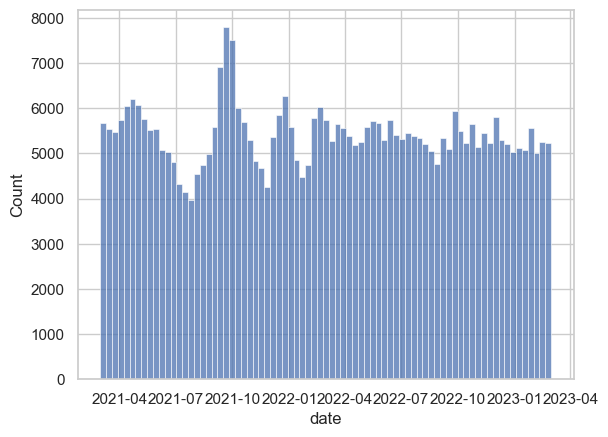

Catégorie 1.0


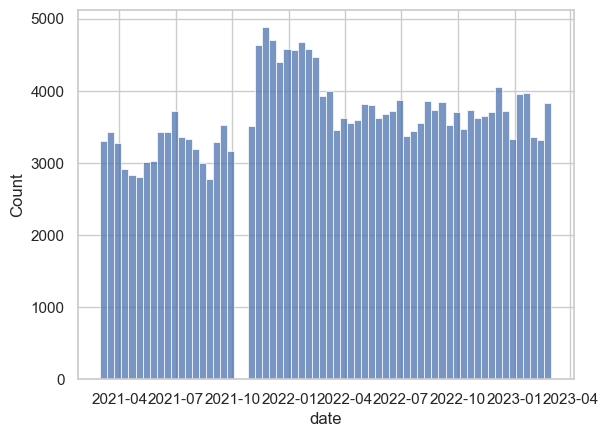

Catégorie 2.0


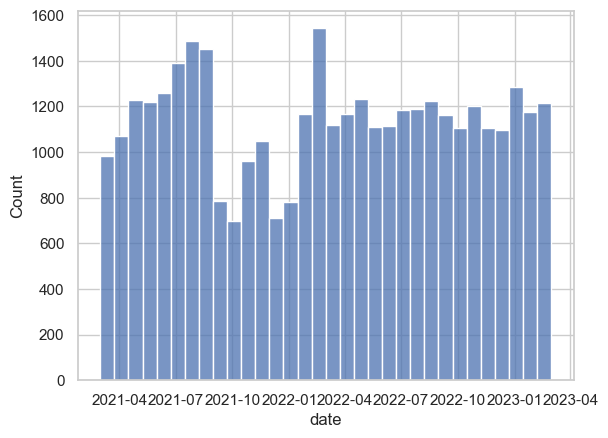

In [97]:
for i in sorted(transaXprodXcust['categ'].unique()):
    print('Catégorie', i)
    sns.histplot(data=transaXprodXcust[transaXprodXcust['categ']==i], x='date')
    plt.show()

Pour la catégorie 0, nous avons une hausse des vente pour septembre 2021

Pour la catégorie 1, nous avons une hausse des ventes fin d'année/ début 2022

Pour la catégorie 2, nous avons une hausse de juillet 2021 et fevrier-mars 2022

# TESTS de mes variables <a class="anchor" id="test_variable"></a>

## Sexe et Categ (CHI 2). <a class="anchor" id="chi2"></a>

L'intérêt du test du Chi2 est de mesurer l'indépendance entre deux variables qualitatives à partir du tableau de contigence.

On pose les hypothèses de départ :

H0 : Variables indépendantes

H1 : Variables sont dépendantes

Degrés de liberté =(Nb de ligne-1)*(nb de colonne-1) soit 2

In [143]:
#Tableau de contigence
contingence= pd.crosstab(B2C_['categ'], B2C_['sex']) 
contingence

sex         f       m
categ                
0.0    200904  186589
1.0    111331  101017
2.0     16980   15868

In [144]:
import researchpy as rp
# Table de contingence normalisée
table, results = rp.crosstab(B2C_['categ'], B2C_['sex'], prop='col', test='chi-square')
print(table)

          sex                
sex         f       m     All
categ                        
0.0     61.03   61.48   61.25
1.0     33.82   33.29   33.56
2.0      5.16    5.23    5.19
All    100.00  100.00  100.00


In [142]:
# Test de Chi 2
table2 = pd.crosstab(B2C_['categ'], B2C_['sex'], margins=False)
stat, p, dof, expected = stats.chi2_contingency(table2)
print('Test de Chi 2 (2 catégorielles)')
print('Stat =',stat)
print('p=',p)
if p > 0.05:
    print('H0: les deux variables sont indépendante')
else:
    print('H1: les deux variable sont dépendantes.')

Test de Chi 2 (2 catégorielles)
Stat = 20.200173796862927
p= 4.1075985631484716e-05
H1: les deux variable sont dépendantes.


L'hypotése H0 est rejeter, il y a un lien entre le sexe et la categorie

## Âge et chiffre d'affaire (Test de correlation) <a class="anchor" id="age_ca_corre"></a>

2 variables **quantitatives** non linéaire donc Spearman

Nous posons 2 hypothèses:
    
    H0 : il n'y a pas de lien entre les variables coef du test = 0
    
    H1: il y a un lien entre les variables coef du test =/ 0
    
Pour savoir qu'elle test utiliser il y a une régle :

Nos variable sont **linéaire** (test de Pearsons) ou **non-linéaire** (test de Spearman)

Nous observons le coefficient de ces tests, il varie de -1 à 1

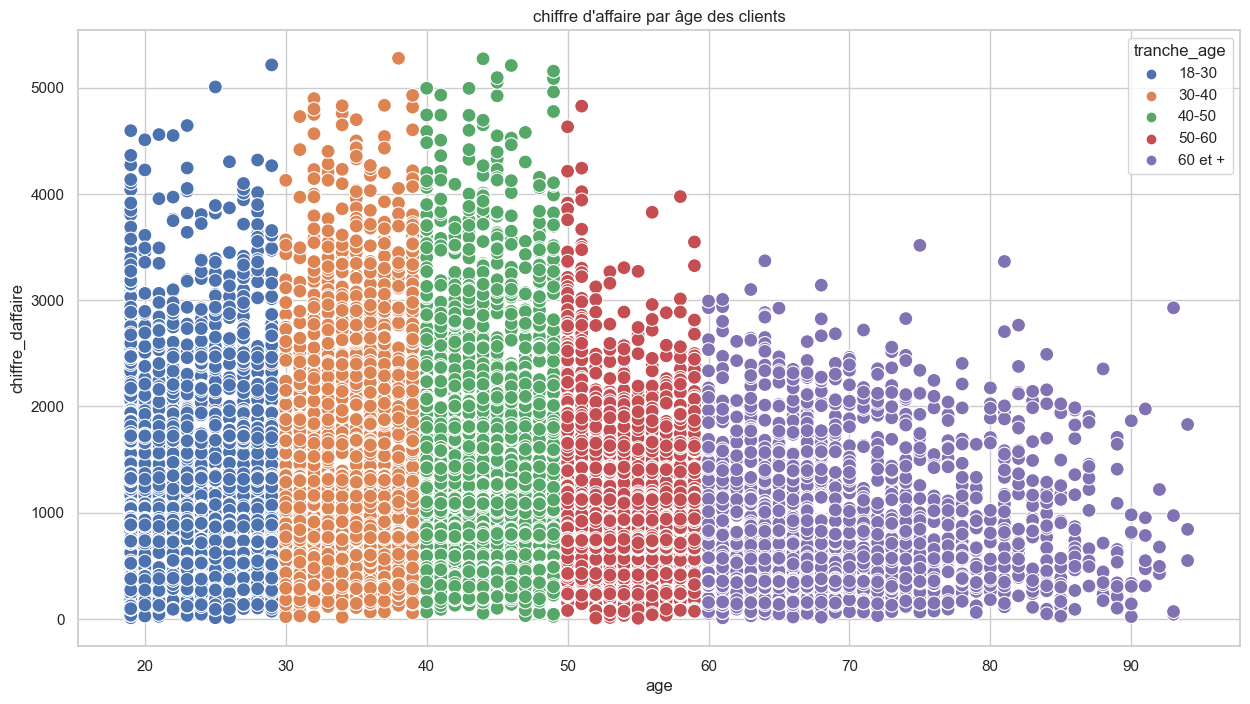

In [102]:
plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.scatterplot(data=B2C.sort_values(by='tranche_age'), x="age", y="chiffre_daffaire", hue='tranche_age',s=100)
plt.title("chiffre d'affaire par âge des clients")
plt.show()

In [103]:
spearmanr(B2C['age'], B2C['chiffre_daffaire'])
print('spearman correlation :',spearmanr(B2C['age'], B2C['chiffre_daffaire'])[0],
    '\npvalue :',spearmanr(B2C['age'], B2C['chiffre_daffaire'])[1])

spearman correlation : -0.18509391863804203 
pvalue : 4.081837970314213e-67


H0 est rejeter, notre coef de spearman est de -0.18 le lien est très faible

## Age et fréquence d'achat <a class="anchor" id="age_fre_corre"></a>

2 variables **quantitatives** non linéaire donc Spearman

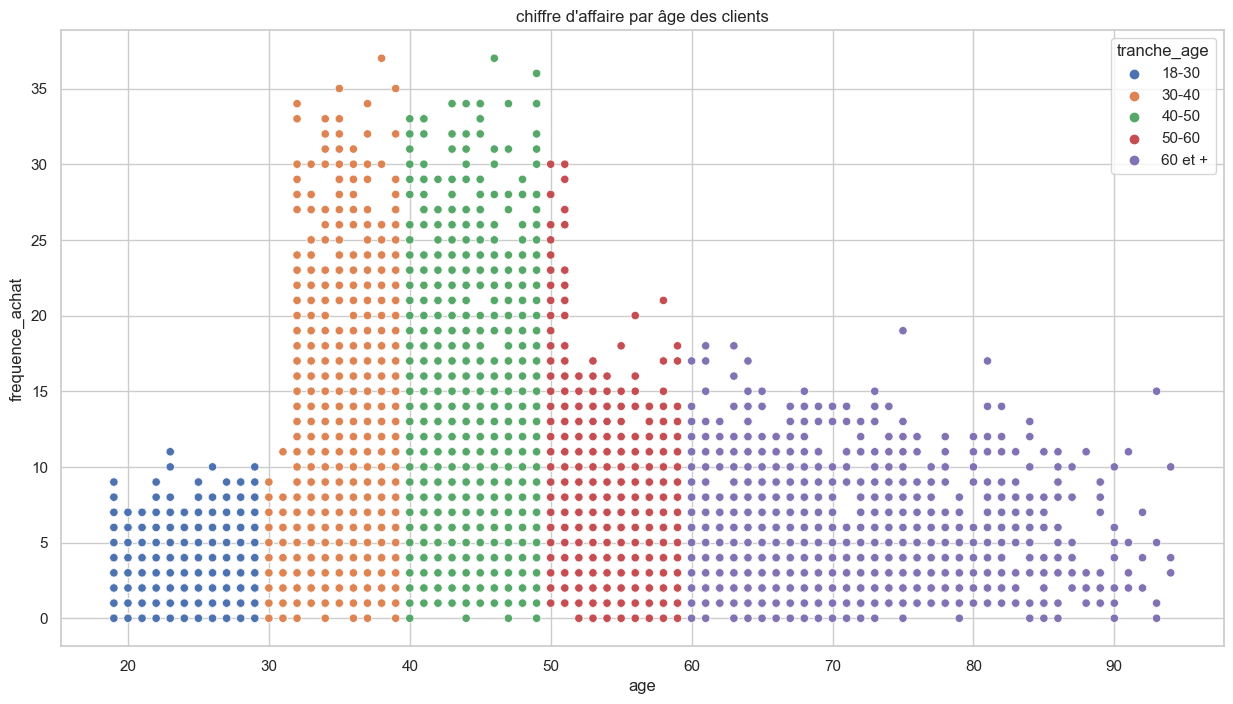

In [104]:
plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.scatterplot(data=B2C.sort_values(by='tranche_age'), x="age", y="frequence_achat", hue='tranche_age')
plt.title("chiffre d'affaire par âge des clients")
plt.show()

In [105]:
spearmanr(B2C['age'], B2C['frequence_achat'])
print('Spearman correlation :',spearmanr(B2C['age'], B2C['frequence_achat'])[0],
    '\npvalue :',spearmanr(B2C['age'], B2C['frequence_achat'])[1])

Spearman correlation : 0.1258744489723427 
pvalue : 1.0638092116012051e-31


H0 est rejeté, notre coef de spearman est de 0.12 le lien est très faible

## Age et panier moyen <a class="anchor" id="age_panier_corre"></a>

2 variables **quantitatives** non linéaire donc Spearman

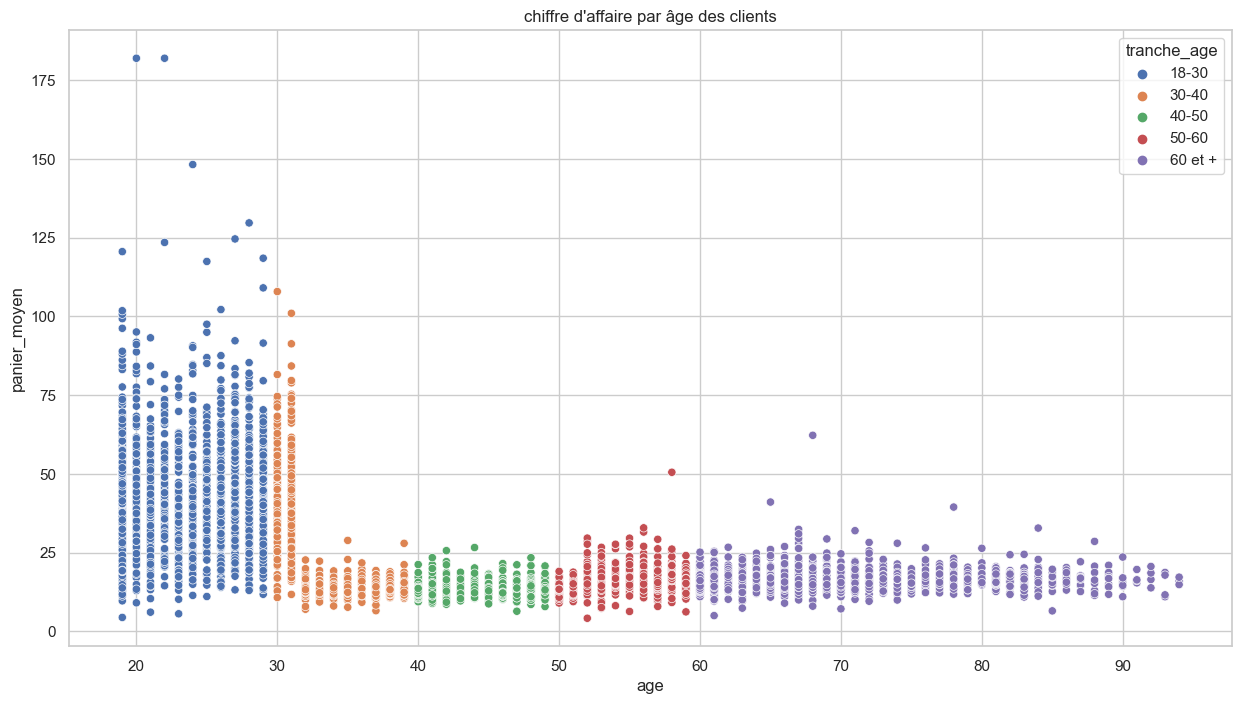

In [106]:
plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.scatterplot(data=B2C.sort_values(by='tranche_age'), x="age", y="panier_moyen", hue='tranche_age')
plt.title("chiffre d'affaire par âge des clients")
plt.show()

In [107]:
spearmanr(B2C['age'], B2C['panier_moyen'])
print('spearmanr correlation :',spearmanr(B2C['age'], B2C['panier_moyen'])[0],
    '\npvalue :',spearmanr(B2C['age'], B2C['panier_moyen'])[1])

spearmanr correlation : -0.32615033934937165 
pvalue : 3.446296386032808e-212


H0 rejeté, notre coef de spearman est de -0.32 le lien est faible

## Categ et age (ANOVA) <a class="anchor" id="anova"></a>

On effectue une analyse de variance pour mesurer l’indépendance entre une variable qualitative et une quantitative.

Dans une ANOVA, on cherche à déterminer si les moyennes des groupes sont significativement différentes. On pose donc :

H0 : Les moyennes de chaque groupe sont égales si p-value > 5%

H1 : Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5%

In [108]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('age ~ categ', data=B2C).fit()
anova_table = sm.stats.anova_lm(model)
print('stats:', anova_table['F'][0],
      '\np value:',anova_table['PR(>F)'][0])
if anova_table['PR(>F)'][0] >0.05:
    print('H0: Les moyennes de chaque groupe sont égales')
else:
    print("H1: au moins une moyennes d'un groupe n'est pas égale")

stats: 517.2411375433541 
p value: 3.087876320004805e-111
H1: au moins une moyennes d'un groupe n'est pas égale


La pertinence de ce test repose sur la validation de plusieurs conditions :
 

-la normalité des résidus avec un test de Shapiro.

-l’égalité des variances que l’on peut verifier avec un test de Bartlett.

### 2.Normalité des résidus <a class="anchor" id="residus"></a>

 L’objectif est de s’assurer que les résidus suivent une loi normale afin de ne pas affirmer qu’il existe une différence de moyenne entre les groupes qui serait causée par le hasard.

On utilise le test de Shapiro-Wilk pour tester la normalité des résidus où :

    -H0 : Les résidus suivent une loi normale si p-value > 5%

    -H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

In [109]:
shapiro= stats.shapiro(model.resid)

print('stats:',shapiro[0],
     '\n p:',shapiro[1])

if shapiro[1]>0.05:
    print('-H0 :Les résidus suivent une loi normale si p-value > 5%')
else:
    print('-H1 : Les résidus ne suivent pas une loi normale si p-value < 5%')


stats: 0.9617946743965149 
 p: 1.1224400699241785e-42
-H1 : Les résidus ne suivent pas une loi normale si p-value < 5%


C:\Users\GUIGUI\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



### 3.Egalite des variances ou l'homoscédasticité <a class="anchor" id="variance"></a>

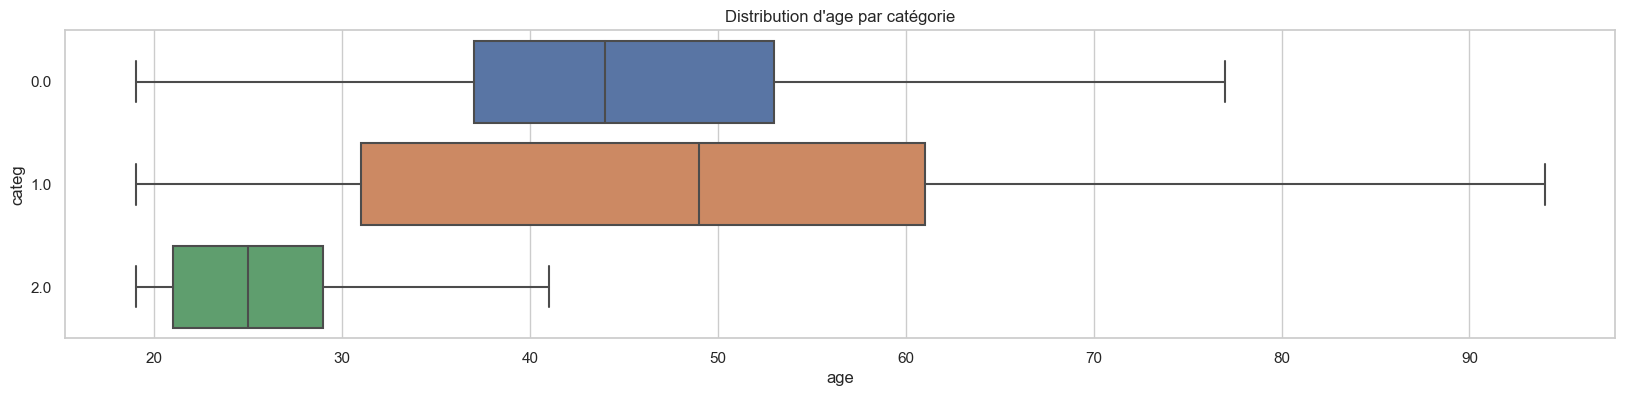

In [110]:
plt.subplots(figsize=(20,4))
g = sns.boxplot(x="age", y="categ", data=B2C,showfliers=False, orient='h')
plt.title("Distribution d'age par catégorie")
plt.show()

In [111]:
B2C.groupby('categ')['age'].agg('var')

categ
0.0    187.453641
1.0    331.242108
2.0     94.353407
Name: age, dtype: float64

C’est le test de levene qui permet de tester si les variances sont significativement différentes ou non avec :

    H0 : Les variances de chaque groupe sont égales si p-value > 5%

    H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

In [112]:
#Test de levene pour la variance lorsque le dataframe ne suis pas une loi normal
levene=stats.levene(B2C[B2C.categ == 0].age,
                    B2C[B2C.categ == 1].age,
                    B2C[B2C.categ == 2].age)

print('stats:',levene[0],
     '\n p:',levene[1])

if levene[1]>0.05: 
    print('H0 : Les variances de chaque groupe sont égales si p-value > 5%')
    
else:
        print('H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%')


stats: 591.6597739836121 
 p: 1.839193475872852e-241
H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%


Il n'y a pas d'égalité des variance ou d'homoscédasticité puisque nous rejeton H0

### Kruskal-Wallis <a class="anchor" id="kruskal"></a>

Dans le cas où la normalité des résidus n'est pas réspecter nous pouvons faire un test de ANOVA **Kruskal-Wallis**

Ce test s'interesse aux medianes de chaque groupe (La médiane est le point milieu d'un jeu de données, de sorte que 50 % des unités ont une valeur inférieure ou égale à la médiane et 50 % des unités ont une valeur supérieure ou égale.)

On utilise l'ANOVA **Kruskal-Wallis** pour tester la médiane de chaque groupe où :

    -H0 : Les médianes de chaque groupe sont égales si p-value > 5%

    -H1 : Les médianes de chaque groupe ne sont pas toutes égales si p-value < 5%

In [113]:
result = stats.kruskal(B2C[B2C.categ == 0].age,
                       B2C[B2C.categ == 1].age,
                       B2C[B2C.categ == 2].age)
print('stats:',result[0],
     '\n p:',result[1])

if result[1]>0.05: 
    print('H0 : Les variances de chaque groupe sont égales si p-value > 5%')
    
else:
        print('H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%')

stats: 1419.1785522256944 
 p: 6.74983204473228e-309
H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%


Nous pouvons donc constater qu'il y a bien un lien entre l'age et la catégorie puisque nous "rejeton" **H0**